## Customer Churn Prediction Project

### Importing Data

In [4]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available: []


In [5]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [6]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set up correctly")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found")


No GPU found


In [7]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
pip install openpyxl

In [10]:
import os
import pandas as pd

# Set the search parameters
filename = 'SalesData.xlsx'
filename2 = 'SalesData2.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the first file (SalesData.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path1 = os.path.join(root, filename)
        break

# Search for the second file (SalesData2.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename2 in files:
        file_path2 = os.path.join(root, filename2)
        break

# Read the first dataset
df1 = pd.read_excel(file_path1)

# Read the second dataset
df2 = pd.read_excel(file_path2)

# Append the second dataset to the first dataset
df = pd.concat([df1, df2], ignore_index=True)

# Display the resulting DataFrame
print(df)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178046 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178083 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178126 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178149 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(ms

       DATA_FROM  QUARTER    TIME_PERIOD CURRENCY_NAME      BUSINESS_UNIT  \
0        Sell-To  CY20-Q1  Calendar Year           USD  Printing Supplies   
1        Sell-To  CY23-Q2  Calendar Year           USD  Printing Supplies   
2        Sell-To  CY22-Q4  Calendar Year           USD  Printing Supplies   
3        Sell-To  CY23-Q1  Calendar Year           USD  Printing Supplies   
4        Sell-To  CY20-Q4  Calendar Year           USD  Printing Supplies   
...          ...      ...            ...           ...                ...   
369223   Sell-To  FY23-Q1    Fiscal Year           USD  Printing Supplies   
369224   Sell-To  FY20-Q2    Fiscal Year           USD  Printing Supplies   
369225   Sell-To  FY23-Q3    Fiscal Year           USD  Printing Supplies   
369226   Sell-To  FY20-Q1    Fiscal Year           USD        Printing HW   
369227   Sell-To  FY21-Q4    Fiscal Year           BRL          Computing   

       CHAI_MAPPING PARTNER_MARKET PARTNER_COUNTRY         PARTNER_CLUSTER 

In [11]:
import os

# Set the search parameters
filename = 'SalesData.xlsx'
filename2 = 'SalesData2.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the first file (SalesData.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path1 = os.path.join(root, filename)
        break

# Search for the second file (SalesData2.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename2 in files:
        file_path2 = os.path.join(root, filename2)
        break

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Read the first dataset
df1 = pd.read_excel(file_path1)
# Read the second dataset
df2 = pd.read_excel(file_path2)
# Append the second dataset to the first dataset
df = pd.concat([df1, df2], ignore_index=True)

In [14]:
df.shape

(369228, 38)

### Pre-Processing

In [15]:
df.shape

(369228, 38)

In [16]:
df.head()

,DATA_FROM,QUARTER,TIME_PERIOD,CURRENCY_NAME,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,...,UNITS,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS,PARTNER_HQ_NAME
0,Sell-To,CY20-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
1,Sell-To,CY23-Q2,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
2,Sell-To,CY22-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
3,Sell-To,CY23-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
4,Sell-To,CY20-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN


In [17]:
df.rename(columns = {'PrarowasRTNrarR_HQ_NrarowasMrar':'PARTNER_HQ_NAME'}, inplace = True)

Removing Useless Columns:

In [18]:
df = df.drop(['CURRENCY_NAME'], axis=1)

In [19]:
#NUMBER OF UNIQUE VALUES
print('BUSINESS UNIT:', df['BUSINESS_UNIT'].nunique())
print('CHAI_MAPPING:', df['CHAI_MAPPING'].nunique())
print('PRODUCT_SEGMENT:', df['PRODUCT_SEGMENT'].nunique())
print('PRODUCT_GROUP:', df['PRODUCT_GROUP'].nunique())
print('PRODUCT_CATEGORY:',df['PRODUCT_CATEGORY'].nunique())
print('PRODUCT_LINE_ID:',df['PRODUCT_LINE_ID'].nunique())

BUSINESS UNIT: 3
CHAI_MAPPING: 8
PRODUCT_SEGMENT: 20
PRODUCT_GROUP: 41
PRODUCT_CATEGORY: 82
PRODUCT_LINE_ID: 115


In [20]:
#NUMBER OF UNIQUE VALUES
print('PARTNER_MARKET:', df['PARTNER_MARKET'].nunique())
print('PARTNER_CLUSTER:', df['PARTNER_CLUSTER'].nunique())
print('PARTNER_COUNTRY:', df['PARTNER_COUNTRY'].nunique())

PARTNER_MARKET: 7
PARTNER_CLUSTER: 21
PARTNER_COUNTRY: 26


In [21]:
df.shape

(369228, 37)

In [22]:
print('PARTNER_CUSTOMER_ID:', df['PARTNER_CUSTOMER_ID'].nunique())
print('PARTNER_HQ_NAME:', df['PARTNER_HQ_NAME'].nunique())
print('PARTNER_LEVEL:', df['PARTNER_LEVEL'].nunique())

PARTNER_CUSTOMER_ID: 29732
PARTNER_HQ_NAME: PARTNER_HQ_NAME    15
PARTNER_HQ_NAME    38
dtype: int64
PARTNER_LEVEL: 3


In [23]:
print('OPSI_ID:', df['OPSI_ID'].nunique())
print('IS_OPSI:', df['IS_OPSI'].nunique())
print('ORG_ID:', df['ORG_ID'].nunique())
print('ORGANIZATION_EXTENDED_NAME:', df['ORGANIZATION_EXTENDED_NAME'].nunique())
print('ST_ID:', df['ST_ID'].nunique())
print('SALES_TERRITORY_EXTENDED_NAME:', df['SALES_TERRITORY_EXTENDED_NAME'].nunique())
print('ONLINE_FLAG:', df['ONLINE_FLAG'].nunique())
print('EMPLOYEE_GROUP:', df['EMPLOYEE_GROUP'].nunique())

OPSI_ID: 29141
IS_OPSI: 2
ORG_ID: 12439
ORGANIZATION_EXTENDED_NAME: 12129
ST_ID: 4114
SALES_TERRITORY_EXTENDED_NAME: 4106
ONLINE_FLAG: 2
EMPLOYEE_GROUP: 11


Removing columns with lot of missing values (More than half the total datapoints):

Processing Date from Quarters:

In [24]:
typ = df['QUARTER'].str.slice(0, 2, 1)
year = '20' + df['QUARTER'].str.slice(2, 4, 1)
qtr = df['QUARTER'].str.slice(5, 7, 1)

In [25]:
saledate = []
for i in range(0,len(typ)):
  st = ""
  if(typ[i] == 'CY'):
    if qtr[i] == 'Q1':
      st = st + year[i] + '-01' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-04' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-07' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-10' + '-01'
  else:
    if qtr[i] == 'Q1':
      st = st + year[i] + '-11' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-02' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-05' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-08' + '-01'
  saledate.append(st)

In [26]:
from datetime import timedelta
df['DATE'] = saledate
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATA_FROM,QUARTER,TIME_PERIOD,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,PRODUCT_GROUP,...,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS,PARTNER_HQ_NAME,DATE
0,Sell-To,CY20-Q1,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2020-01-01
1,Sell-To,CY23-Q2,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2023-04-01
2,Sell-To,CY22-Q4,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2022-10-01
3,Sell-To,CY23-Q1,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2023-01-01
4,Sell-To,CY20-Q4,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369223,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,84583.0,EDUCATION,746.0,501-1000,59534.08,3341212.49,2561.23,2429156.43,"Copiers Northwest, Inc",2023-11-01
369224,Sell-To,FY20-Q2,Fiscal Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,84583.0,EDUCATION,746.0,501-1000,59534.08,3341212.49,2561.23,2429156.43,"Copiers Northwest, Inc",2020-02-01
369225,Sell-To,FY23-Q3,Fiscal Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,BANKING,21.0,1950-11-01 00:00:00,NaN,NaN,NaN,NaN,"Copiers Northwest, Inc",2023-05-01
369226,Sell-To,FY20-Q1,Fiscal Year,Printing HW,Print HW,North America,USA,United States Extended,Office Printing Solutions HW,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,"Copiers Northwest, Inc",2020-11-01


In [27]:
#df.to_excel('output_file.xlsx', index=False)

In [28]:
df_c = df

In [29]:
df_c['PRODUCT_CATEGORY'].isnull().sum()

0

In [30]:
df = df.sort_values(by=['PARTNER_ID', 'DATE'])
df

,DATA_FROM,QUARTER,TIME_PERIOD,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,PRODUCT_GROUP,...,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS,PARTNER_HQ_NAME,DATE
2742,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,Displays,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Displays Solutions & 3PO,...,74869.0,LEISURE AND HOSPITALITY,93391.0,> 1000,4516086.79,23689495.97,4833052.55,22016063.09,NaN,2018-10-01
2743,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,Peripherals,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Peripherals,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2018-10-01
5357,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,PC HW,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Compute,...,302942.0,BUSINESS SERVICES,6000.0,> 1000,66000.00,2456014.00,0.00,1601261.58,NaN,2018-10-01
21491,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,PC HW,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Compute,...,304449.0,GOVERNMENT CENTRAL,150000.0,> 1000,4125000.00,30000000.00,1385322.36,23860093.92,NaN,2018-10-01
21492,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,PC HW,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Compute,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213407,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,Central and Eastern Europe,Slovakia,CZ/SK,NaN,NaN,...,NaN,ENGINEERING SERVICES,3.0,065410-2023,NaN,NaN,NaN,NaN,NaN,2023-11-01
216288,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,Central and Eastern Europe,Slovakia,CZ/SK,NaN,NaN,...,NaN,DISCRETE - ENERGY & NAT. RES.,19.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-01
216936,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,Central and Eastern Europe,Slovakia,CZ/SK,NaN,NaN,...,700100144.0,BUSINESS SERVICES,12.0,NaN,299.00,962.00,0.00,0.00,NaN,2023-11-01
220596,Shipments/Sell-Thru,FY23-Q1,Fiscal Year,Computing,PC HW,Central and Eastern Europe,Slovakia,CZ/SK,Business PC Solutions,Commercial Compute,...,600680412.0,OTHER,253.0,20654500,0.00,0.00,0.00,0.00,NaN,2023-11-01


In [31]:
'''df['purchase_flag'] = df.apply(lambda x: 1 if (x['UNITS'] > 0 or x['REVENUE_USD'] > 0) else 0, axis=1)
# Create the churn label: Check if the sum of purchases in the last two quarters is 0
df['churn_label'] = df.groupby('PARTNER_ID')['purchase_flag'].rolling(window=2, min_periods=2).sum().reset_index(0, drop=True)
df['churn_label'] = df['churn_label'].apply(lambda x: 1 if x == 0 else 0)
df'''

"df['purchase_flag'] = df.apply(lambda x: 1 if (x['UNITS'] > 0 or x['REVENUE_USD'] > 0) else 0, axis=1)\n# Create the churn label: Check if the sum of purchases in the last two quarters is 0\ndf['churn_label'] = df.groupby('PARTNER_ID')['purchase_flag'].rolling(window=2, min_periods=2).sum().reset_index(0, drop=True)\ndf['churn_label'] = df['churn_label'].apply(lambda x: 1 if x == 0 else 0)\ndf"

In [32]:
import datetime
from datetime import datetime
saledate2 = []
for i in saledate:
  dt = datetime.strptime(i, '%Y-%m-%d')
  saledate2.append(dt)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
df_check = df

In [35]:
#df.to_excel('output_file_churn.xlsx', index=False)

Creating the Aggregate Column:

In [36]:
# Drop Irrelevant Columns
drop_columns = ['QUARTER', 'TIME_PERIOD', 'PARTNER_HQ_NAME', 'PARTNER_CUSTOMER_ID', 'OPSI_ID',
                'ORG_ID', 'ORGANIZATION_EXTENDED_NAME', 'ST_ID', 'SLS_TTY_IDENTIFIER',
                'EMP_TOTAL', 'EMPLOYEE_GROUP', 'TAM_PRINT', 'TAM_PS', 'REVENUE_PRINT', 'REVENUE_PS',
                'REAL_UNITS', 'PRODUCT_UNITS', 'REVENUE_LC','SALES_TERRITORY_EXTENDED_NAME']

df = df.drop(columns=drop_columns, errors='ignore')

In [37]:
from itertools import product

# Extract Year and Quarter based on month
df['year'] = df['DATE'].dt.year  # Extracts Year
df['quarter'] = df['DATE'].dt.quarter  # Automatically assigns quarters

df['IS_OPSI'] = df['IS_OPSI'].astype(int)
df['ONLINE_FLAG'] = df['ONLINE_FLAG'].apply(lambda x: 0 if x == 'N' else 1)

df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.lower()

# Step 1: Aggregate sales per (Customer, Product Category, Quarter)
agg_df = df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter']).agg({
    'UNITS': 'sum',
    'REVENUE_USD': 'sum',
    'DATA_FROM': 'first',
    'IS_OPSI': 'max',
    'ONLINE_FLAG': 'max',
    'PARTNER_LEVEL': 'first',
    'PARTNER_MARKET': 'first',
    'PARTNER_CLUSTER': 'first',
    'PARTNER_COUNTRY': 'first',
    'BUSINESS_UNIT': 'first',
    'CHAI_MAPPING': 'first',
    'PRODUCT_SEGMENT': 'first',
    'PRODUCT_GROUP': 'first',
    'RAD_VERTICAL': 'first',
    'DATE': 'max',  # Most recent purchase date
}).reset_index()

agg_df['total_transactions'] = df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter']).size().values

# Step 2: Generate a complete Quarter-Year Grid for all Partner-Product combinations
all_partners = df['PARTNER_ID'].unique()
all_products = df['PRODUCT_CATEGORY'].unique()
all_years = df['year'].unique()
all_years = all_years[all_years != 2018]
all_quarters = [1, 2, 3, 4]  # Fixed Q1 to Q4

# Create all possible (PARTNER_ID, PRODUCT_CATEGORY, year, quarter) combinations
full_grid = pd.DataFrame(list(product(all_partners, all_products, all_years, all_quarters)),
                         columns=['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'])

# Step 3: Merge with actual data to ensure missing quarters are filled
agg_df = full_grid.merge(agg_df, on=['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'], how='left')

# Step 4: Fill missing values (assume no purchase if missing)
agg_df['UNITS'].fillna(0, inplace=True)
agg_df['REVENUE_USD'].fillna(0, inplace=True)
agg_df['RAD_VERTICAL'].fillna("Unknown", inplace=True)

# Step 5: Create purchase flag
agg_df['purchase_flag'] = agg_df.apply(lambda x: 1 if (x['UNITS'] > 0 or x['REVENUE_USD'] > 0) else 0, axis=1)

In [38]:
import pandas as pd

# Identify customer-product category pairs that have at least one nonzero revenue
valid_combos = agg_df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['REVENUE_USD'].sum()
valid_combos = set(valid_combos[valid_combos > 0].index)

# Keep only rows where customer-product category pair exists in valid_combos
agg_df = agg_df[agg_df.set_index(['PARTNER_ID', 'PRODUCT_CATEGORY']).index.isin(valid_combos)]

In [39]:
agg_df.columns

Index(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter', 'UNITS',
       'REVENUE_USD', 'DATA_FROM', 'IS_OPSI', 'ONLINE_FLAG', 'PARTNER_LEVEL',
       'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY', 'BUSINESS_UNIT',
       'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'RAD_VERTICAL',
       'DATE', 'total_transactions', 'purchase_flag'],
      dtype='object')

Handling missing values:

In [40]:
# Convert 'DATE' to datetime format (if not already)
agg_df['DATE'] = pd.to_datetime(agg_df['DATE'])

# Define a function to get the first day of the quarter
def get_quarter_start(year, quarter):
    quarter_start_dates = {1: "-01-01", 2: "-04-01", 3: "-07-01", 4: "-10-01"}
    return pd.to_datetime(str(year) + quarter_start_dates[quarter])

# Fill missing DATE values with the first day of the corresponding quarter
agg_df['DATE'] = agg_df.apply(lambda row: get_quarter_start(row['year'], row['quarter']) if pd.isna(row['DATE']) else row['DATE'], axis=1)

In [41]:
# Drop irrelevant columns
agg_df.drop(columns=['PARTNER_LEVEL', 'total_transactions'], inplace=True, errors='ignore')

# Fill DATA_FROM with the most common value (mode)
agg_df['DATA_FROM'].fillna(agg_df['DATA_FROM'].mode()[0], inplace=True)

# Fill IS_OPSI with 0 (assumption: missing means "not OPSI")
agg_df['IS_OPSI'].fillna(0, inplace=True)

# Fill ONLINE_FLAG with 0 (assumption: missing means "not online")
agg_df['ONLINE_FLAG'].fillna(0, inplace=True)

# Fill PARTNER_MARKET, PARTNER_CLUSTER, and PARTNER_COUNTRY based on PARTNER_ID
for col in ['PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY']:
    agg_df[col] = agg_df.groupby('PARTNER_ID')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Fill BUSINESS_UNIT, CHAI_MAPPING, PRODUCT_SEGMENT, and PRODUCT_GROUP based on PRODUCT_CATEGORY
for col in ['BUSINESS_UNIT', 'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP']:
    agg_df[col] = agg_df.groupby('PRODUCT_CATEGORY')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [42]:
agg_df.isnull().sum()

,0
PARTNER_ID,0
PRODUCT_CATEGORY,0
year,0
quarter,0
UNITS,0
REVENUE_USD,0
DATA_FROM,0
IS_OPSI,0
ONLINE_FLAG,0
PARTNER_MARKET,0


In [43]:
df_for = agg_df

In [163]:
df_ecdf = agg_df

### Forecasting Model:

#### ARIMA:

In [49]:
pip install statsmodels

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.arima.model import ARIMA

In [50]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s eta 0:00:00


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm  # Auto ARIMA for best (p,d,q)
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

def arima_forecast_churn(df_for):
    # Get unique PARTNER_ID and PRODUCT_CATEGORY combinations
    unique_combinations = df_for[['PARTNER_ID', 'PRODUCT_CATEGORY']].drop_duplicates()
    results = []

    # Iterate over each unique (PARTNER_ID, PRODUCT_CATEGORY) combination
    for _, row in unique_combinations.iterrows():
        partner_id = row['PARTNER_ID']
        product_category = row['PRODUCT_CATEGORY']

        print(f'\n--------------------FORECASTING FOR PARTNER_ID: {partner_id}, PRODUCT_CATEGORY: {product_category}----------------------------')

        # Filter data for the current (PARTNER_ID, PRODUCT_CATEGORY) combination
        df_subset = df_for[(df_for['PARTNER_ID'] == partner_id) & (df_for['PRODUCT_CATEGORY'] == product_category)]

        # Ensure there are enough data points (Skip if < 12 time periods)
        if len(df_subset) < 12:
            print(f"Skipping {partner_id} - {product_category} due to insufficient data (<12 points).")
            results.append({
                'PARTNER_ID': partner_id,
                'PRODUCT_CATEGORY': product_category,
                'MAPE': None,
                'Churn_Status': "Insufficient Data"
            })
            continue

        # Data preprocessing
        df2 = df_subset[['DATE', 'REVENUE_USD']].copy()
        df2.set_index('DATE', inplace=True)
        df2 = df2.resample('D').sum()  # Resample to daily frequency, summing revenue

        # Handle missing values
        '''df2.replace(0, np.nan, inplace=True)
        df2.interpolate(method='linear', inplace=True)'''

        '''# Ensure no artificial NaNs are introduced
        df2.fillna(0, inplace=True)  # Fill any NaNs (if they exist) with 0s

        # If a partner-product pair has all zeros, skip it (ARIMA can't forecast only zeros)
        if df2['REVENUE_USD'].sum() == 0:
            print(f"Skipping {partner_id} - {product_category} because all revenue is 0.")
            results.append({
                'PARTNER_ID': partner_id,
                'PRODUCT_CATEGORY': product_category,
                'MAPE': None,
                'Churn_Status': "All Sales Zero"
            })
            continue

        # If too many consecutive 0s exist, smooth it slightly for ARIMA stability
        df2['REVENUE_USD'] = df2['REVENUE_USD'].rolling(window=3, min_periods=1).mean()'''

        df2.replace(0, np.nan, inplace=True)  # Replace zero sales with NaN
        df2.interpolate(method='linear', inplace=True)  # Fill missing values
        df2.fillna(method='bfill', inplace=True)  # Backfill for remaining NaNs
        df2.fillna(method='ffill', inplace=True)  # Forward fill as a final safety step
        df2.dropna(inplace=True)  # Ensure no NaN values remain



        # Splitting the data into training and testing sets
        '''train_size = int(0.75 * len(df2))
        train, test = df2.iloc[:train_size], df2.iloc[train_size:]'''

        # Split data: Train up to 2022, Test from 2023 onwards
        train = df2[df2.index < '2023-01-01']
        test = df2[df2.index >= '2023-01-01']

        # Ensure we have valid train and test sets
        if train.empty or test.empty:
            print(f"Skipping {partner_id} - {product_category} due to insufficient train/test data.")
            results.append({
                'PARTNER_ID': partner_id,
                'PRODUCT_CATEGORY': product_category,
                'MAPE': None,
                'Churn_Status': "Insufficient Data"
            })
            continue

        # Forecast future revenue using ARIMA
        try:
            # Use Auto ARIMA to find the best order
            best_order = pm.auto_arima(train['REVENUE_USD'], seasonal=False, suppress_warnings=True, stepwise=True).order
            #print(f"Selected ARIMA order for {partner_id} - {product_category}: {best_order}")

            model = ARIMA(train['REVENUE_USD'], order=best_order)
            model_fit = model.fit()
            forecast_steps = len(test) + 3  # Forecasting additional 3 quarters
            forecast = model_fit.forecast(steps=forecast_steps)

            # Compute MAPE (Only if test set has data)
            forecast_actual_len = min(len(test), len(forecast))
            if forecast_actual_len > 0:
                mape = mean_absolute_percentage_error(test['REVENUE_USD'][:forecast_actual_len], forecast[:forecast_actual_len])
            else:
                mape = None

            # Churn Logic: If last 3 quarters are zero, classify as churned
            last_3_quarters_forecast = forecast[-3:]
            if all(value <= 0 for value in last_3_quarters_forecast):
                churn_label = "Churned"
            elif any(value <= 0 for value in last_3_quarters_forecast):
                churn_label = "Going to be Churned"
            else:
                churn_label = "Safe"

            # Store results
            results.append({
                'PARTNER_ID': partner_id,
                'PRODUCT_CATEGORY': product_category,
                'MAPE': mape,
                'Churn_Status': churn_label
            })

            print(f"MAPE for {partner_id} - {product_category}: {mape:.4f}, Predicted Churn Status: {churn_label}")

        except Exception as e:
            print(f"Skipping {partner_id} - {product_category} due to ARIMA model error: {str(e)}")
            results.append({
                'PARTNER_ID': partner_id,
                'PRODUCT_CATEGORY': product_category,
                'MAPE': None,
                'Churn_Status': "Error in ARIMA"
            })

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
results_df = arima_forecast_churn(df_for)


--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: commercial displays----------------------------
MAPE for 0345M99-18534 - commercial displays: 2.0252, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 0345M99-18534 - commercial peripherals: 1.2385, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 0345M99-18534 - commercial notebooks: 8.4703, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 0345M99-18534 - mobile workstations: 4.9124, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 0345M

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-18534 - ps manageability and security: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: consumer gaming----------------------------
MAPE for 0345M99-18534 - consumer gaming: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: scanners----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-18534 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 0345M99-18534 - consumer displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: managed print services----------------------------
MAPE for 0345M99-18534 - managed print services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: spts----------------------------
MAPE for 0345M99-18534 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: consumer desktops----------------------------
MAPE for 0345M99-18534 - consumer desktops: 1.0264, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 0345M99-18534, PRODUCT_CATEGORY: ps consumer transaction

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19291 - commercial displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 0345M99-19291 - commercial peripherals: 0.4438, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 0345M99-19291 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 0345M99-19291 - mobile workstations: 0.4214, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: ps lifecycle services----------------------------
MAPE for 0345M99-19291 - ps lifecycle services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19291 - print support services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: office pagewide printers----------------------------
MAPE for 0345M99-19291 - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 0345M99-19291 - ops ink supplies: 1.4665, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 0345M99-19291 - home ink printers: 3.7084, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 0345M99-19291 - large format design: 0.1985, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19291 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 0345M99-19291 - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 0345M99-19291 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 0345M99-19291 - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19291, PRODUCT_CATEGORY: phs other----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19291 - phs other: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: commercial displays----------------------------
MAPE for 0345M99-19396 - commercial displays: 3.5820, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 0345M99-19396 - commercial peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 0345M99-19396 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 0345M99-19396 - workstations: 3.0428, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGO

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19396 - office non managed: 0.4460, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: office managed----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19396 - office managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 0345M99-19396 - home laser printers: 2.3897, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 0345M99-19396 - home ink printers: 6.5325, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 0345M99-19396 - scanners: 0.3913, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 0345M99-19396 - consumer displays: 0.3853, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: consumer deskto

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19396 - consumer desktops: 0.8409, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: ps consumer transactional services----------------------------
MAPE for 0345M99-19396 - ps consumer transactional services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: consumer notebooks----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345M99-19396 - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345M99-19396, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 0345M99-19396 - big tank: 4.7774, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345MDH-10365, PRODUCT_CATEGORY: commercial displays----------------------------
MAPE for 0345MDH-10365 - commercial displays: 0.0441, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345MDH-10365, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 0345MDH-10365 - commercial peripherals: 0.9065, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 0345MDH-10365, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 0345MDH-10365 - commercial notebooks: 2.1247, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345MDH-10365, PRODUCT_CATEG

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 0345MDH-10365 - consumer desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 0345MDH-10365, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 0345MDH-10365 - consumer peripherals: 1.3901, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: commercial displays----------------------------
MAPE for 1-10LZ6-13770 - commercial displays: 0.3016, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 1-10LZ6-13770 - commercial peripherals: 893.9073, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 1-10LZ6-13770 - commercial notebooks: 20.9206, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10L

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-10LZ6-13770 - cloud clients: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: commercial dockings----------------------------
MAPE for 1-10LZ6-13770 - commercial dockings: 104.0015, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 1-10LZ6-13770 - commercial desktops: 0.2221, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: home ink consumer printers----------------------------
MAPE for 1-10LZ6-13770 - home ink consumer printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 1-10LZ6-13770 - hps ink supplies: 0.2636, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-1377

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-10LZ6-13770 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 1-10LZ6-13770 - consumer peripherals: 4.1334, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-13770, PRODUCT_CATEGORY: commercial third party options----------------------------
MAPE for 1-10LZ6-13770 - commercial third party options: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: commercial displays----------------------------
MAPE for 1-10LZ6-15843 - commercial displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 1-10LZ6-15843 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-10LZ6-15843 - workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: ps lifecycle services----------------------------
MAPE for 1-10LZ6-15843 - ps lifecycle services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 1-10LZ6-15843 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 1-10LZ6-15843 - hps ink supplies: 0.7369, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 1-10LZ6-15843 - office non managed: 0.4713, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_C

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-10LZ6-15843 - managed print services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: ps consumer transactional services----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-10LZ6-15843 - ps consumer transactional services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 1-10LZ6-15843 - consumer notebooks: 1.6506, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 1-10LZ6-15843, PRODUCT_CATEGORY: big tank----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-10LZ6-15843 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-S20K-124, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 1-S20K-124 - commercial notebooks: 0.9985, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 1-S20K-124, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 1-S20K-124 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-S20K-124, PRODUCT_CATEGORY: home ink consumer printers----------------------------
MAPE for 1-S20K-124 - home ink consumer printers: 5.9942, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-S20K-124, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 1-S20K-124 - hps ink supplies: 0.4951, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-S20K-124, PRODUCT_CATEGORY: office n

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-YSTYH9 - commercial dockings: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 1-YSTYH9 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 1-YSTYH9 - office non managed: 0.7348, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 1-YSTYH9 - ops toner supplies: 0.4940, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 1-YSTYH9 - hps toner supplies: 1.3084, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: office managed-------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-YSTYH9 - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 1-YSTYH9 - ops ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: consumer gaming----------------------------
MAPE for 1-YSTYH9 - consumer gaming: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 1-YSTYH9 - consumer displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: spts----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-YSTYH9 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: consumer notebooks----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 1-YSTYH9 - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 1-YSTYH9, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 1-YSTYH9 - consumer peripherals: 0.8834, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSE4-9637, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 123HSE4-9637 - commercial peripherals: 4.1398, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSE4-9637, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 123HSE4-9637 - commercial notebooks: 0.8927, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSE4-9637, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 123HSE4-9637 - mobile workstations: 2.3856, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 123HSE4-9637, PRODUCT_CAT

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 123HSGW-6484 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSGW-6484, PRODUCT_CATEGORY: spts----------------------------
MAPE for 123HSGW-6484 - spts: 0.9015, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 123HSIB-19739 - commercial peripherals: 1.2301, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 123HSIB-19739 - commercial notebooks: 0.1804, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 123HSIB-19739 - mobile workstations: 0.9428, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: workstations-

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 123HSIB-19739 - large format design: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 123HSIB-19739 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 123HSIB-19739 - consumer notebooks: 0.1527, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 123HSIB-19739 - big tank: 44.9167, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 123HSIB-19739 - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIB-19739, PRODUCT_CATEGORY: commercial displays (l5)--

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 123HSIB-19739 - psg retail solutions: 0.9182, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 123HSIP-5318 - commercial peripherals: 1.5916, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 123HSIP-5318 - commercial notebooks: 0.6699, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 123HSIP-5318 - mobile workstations: 0.4355, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 123HSIP-5318 - workstations: 0.1979, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_C

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 123HSIP-5318 - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 123HSIP-5318 - big tank: 83.7827, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: consumer peripherals----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 123HSIP-5318 - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: commercial third party options----------------------------
MAPE for 123HSIP-5318 - commercial third party options: 0.0000, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 123HSIP-5318 - commercial displays (l5): 0.2383, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 123HSIP-5318, PRODUCT_CATEGORY: ps managed services----------------------------
MAPE for 123HSIP-5318 - ps managed services: 1.2271, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 2-15QO7YP - commercial peripherals: 0.3127, Predicted Churn Status: Safe

--------------------FORECASTING FOR P

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-15QO7YP - mobile workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 2-15QO7YP - workstations: 0.5030, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: ps lifecycle services----------------------------
MAPE for 2-15QO7YP - ps lifecycle services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: cloud clients----------------------------
MAPE for 2-15QO7YP - cloud clients: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-15QO7YP - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: hps ink supplies--------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-15QO7YP - print support services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: office pagewide printers----------------------------
MAPE for 2-15QO7YP - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: ops ink supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-15QO7YP - ops ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 2-15QO7YP - home ink printers: 0.4882, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 2-15QO7YP - large format design: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: consumer gaming----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-15QO7YP - consumer gaming: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 2-15QO7YP - scanners: 0.2560, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 2-15QO7YP - consumer displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 2-15QO7YP - consumer notebooks: 0.0889, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 2-15QO7YP - big tank: 0.3462, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-15QO7YP, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 2-15QO7YP - consume

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - office non managed: 0.5911, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: ops toner supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - ops toner supplies: 0.7955, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 2-19AYBTB - hps toner supplies: 0.7552, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 2-19AYBTB - home laser printers: 3.5263, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 2-19AYBTB - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: large format design----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - large format design: 0.7202, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: scanners----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - scanners: 0.7434, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: consumer desktops----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - consumer desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: consumer notebooks----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 2-19AYBTB - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-19AYBTB, PRODUCT_CATEGORY: commercial displays (l5)----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-19AYBTB - commercial displays (l5): 4.9630, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 2-SISC-24215 - commercial peripherals: 20.8250, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 2-SISC-24215 - commercial notebooks: 9.8163, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 2-SISC-24215 - mobile workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 2-SISC-24215 - workstations: 0.8860, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CAT

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SISC-24215 - commercial desktops: 8.8258, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SISC-24215 - hps ink supplies: 1.6131, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-SISC-24215 - office non managed: 8.2546, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SISC-24215 - ops toner supplies: 0.6566, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 2-SISC-24215 - hps toner supplies: 248.4522, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-24215, PRODUCT_CATEGORY: 

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SISC-7587 - workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: ps lifecycle services----------------------------
MAPE for 2-SISC-7587 - ps lifecycle services: 2.2194, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-SISC-7587 - commercial desktops: 1.0895, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: hps ink supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SISC-7587 - hps ink supplies: 0.3646, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-SISC-7587 - office non managed: 0.5571, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SISC-7587 - ops toner supplies: 5.4238, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: hps toner supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SISC-7587 - hps toner supplies: 4.7204, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: office managed----------------------------
MAPE for 2-SISC-7587 - office managed: 0.7710, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 2-SISC-7587 - home laser printers: 0.2839, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: print support services----------------------------
MAPE for 2-SISC-7587 - print support services: 2.2294, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: ops ink supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SISC-7587 - ops ink supplies: 1.3272, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 2-SISC-7587 - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 2-SISC-7587 - large format design: 0.8074, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 2-SISC-7587 - scanners: 1.5224, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 2-SISC-7587 - consumer notebooks: 5.1011, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-7587, PRODUCT_CATEGORY: consumer peripherals-----------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SISC-8202 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-8202, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 2-SISC-8202 - consumer displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-8202, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 2-SISC-8202 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-8202, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 2-SISC-8202 - consumer peripherals: 0.0943, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-8202, PRODUCT_CATEGORY: commercial third party options----------------------------
MAPE for 2-SISC-8202 - commercial third party options: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SISC-8202, PRODUCT_CATEGORY: commercial displ

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-12151 - cloud clients: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-SIVP-12151 - commercial desktops: 1.7585, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-SIVP-12151 - office non managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: office managed----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-12151 - office managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 2-SIVP-12151 - home laser printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: large format design----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-12151 - large format design: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 2-SIVP-12151 - consumer displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-12151, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 2-SIVP-12151 - commercial displays (l5): 2.1986, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-21163, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SIVP-21163 - hps ink supplies: 0.6002, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-21163, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SIVP-21163 - ops toner supplies: 1.1392, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-21163, PRODUCT_CATEG

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-21163 - large format design: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 2-SIVP-24 - commercial peripherals: 2.9849, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 2-SIVP-24 - commercial notebooks: 2.0580, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 2-SIVP-24 - mobile workstations: 6.9205, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 2-SIVP-24 - workstations: 3.8355, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: ps lifecycle services--

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-24 - commercial desktops: 1.4838, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SIVP-24 - hps ink supplies: 0.1667, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: office non managed----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-24 - office non managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SIVP-24 - ops toner supplies: 0.8936, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: office managed----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-24 - office managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: print support services----------------------------
MAPE for 2-SIVP-24 - print support services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: office pagewide printers----------------------------
MAPE for 2-SIVP-24 - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 2-SIVP-24 - ops ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 2-SIVP-24 - home ink printers: 1.3666, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-24, PRODUCT_CATEGORY: large format design---

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-3218 - home laser printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-3218, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 2-SIVP-3218 - ops ink supplies: 2.9753, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-3218, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 2-SIVP-3218 - large format design: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-3218, PRODUCT_CATEGORY: commercial displays (l5)----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-3218 - commercial displays (l5): 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SIVP-6899 - hps ink supplies: 0.0819, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: office non managed----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-6899 - office non managed: 8.6243, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SIVP-6899 - ops toner supplies: 0.5728, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 2-SIVP-6899 - hps toner supplies: 0.4363, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: home laser printers----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-6899 - home laser printers: 0.4604, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: print support services----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-6899 - print support services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 2-SIVP-6899 - ops ink supplies: 0.3740, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: home ink printers----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIVP-6899 - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 2-SIVP-6899 - large format design: 0.6548, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIVP-6899, PRODUCT_CATEGORY: spts----------------------------
MAPE for 2-SIVP-6899 - spts: 5.7793, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 2-SIWB-16006 - commercial peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: commercial notebooks----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIWB-16006 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: ps lifecycle services----------------------------
MAPE for 2-SIWB-16006 - ps lifecycle services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: commercial dockings----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIWB-16006 - commercial dockings: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-SIWB-16006 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SIWB-16006 - hps ink supplies: 0.8751, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SIWB-16006 - ops toner supplies: 0.3537, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 2-SIWB-16006 - hps toner supplies: 2.1786, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SIWB-16006, PRODUCT_CATEGORY: 

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIYA-5121 - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-5121, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 2-SIYA-5121 - commercial displays (l5): 0.9713, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: commercial peripherals----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIYA-8895 - commercial peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: commercial notebooks----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIYA-8895 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: mobile workstations----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIYA-8895 - mobile workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: ps lifecycle services----------------------------
MAPE for 2-SIYA-8895 - ps lifecycle services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-SIYA-8895 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SIYA-8895 - hps ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-SIYA-8895 - office non managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: ops ton

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIYA-8895 - home laser printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SIYA-8895, PRODUCT_CATEGORY: commercial displays (l5)----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SIYA-8895 - commercial displays (l5): 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 2-SPVR-142 - commercial peripherals: 61.6889, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 2-SPVR-142 - commercial notebooks: 0.3488, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: ps lifecycle services----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SPVR-142 - ps lifecycle services: 0.0927, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: commercial dockings----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SPVR-142 - commercial dockings: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-SPVR-142 - commercial desktops: 6.4193, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-SPVR-142 - hps ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-SPVR-142 - office non managed: 0.4046, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-SPVR-142 - ops toner supplies: 0.0693, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: hps toner supplies-----

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-SPVR-142 - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-SPVR-142, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 2-SPVR-142 - commercial displays (l5): 3.7155, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-WGQU-93 - hps ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-WGQU-93 - office non managed: 151.9859, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-WGQU-93 - ops toner supplies: 6.4383, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: office mana

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-WGQU-93 - print support services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: office pagewide printers----------------------------
MAPE for 2-WGQU-93 - office pagewide printers: 2.8759, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 2-WGQU-93 - ops ink supplies: 1.4340, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 2-WGQU-93 - large format design: 0.4305, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 2-WGQU-93 - scanners: 18.0584, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 2-WGQU-93, PRODUCT_CATEGORY: big tank--------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 2-WPAN-20 - commercial dockings: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WPAN-20, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 2-WPAN-20 - commercial desktops: 0.7749, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WPAN-20, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 2-WPAN-20 - hps ink supplies: 0.3943, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WPAN-20, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 2-WPAN-20 - office non managed: 0.5887, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WPAN-20, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 2-WPAN-20 - ops toner supplies: 1.6446, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 2-WPAN-20, PRODUCT_CATEGORY: hps toner supplies---------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSE4-10483 - office non managed: 0.2248, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-10483, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 3-HSE4-10483 - ops toner supplies: 0.6959, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-10483, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 3-HSE4-10483 - hps toner supplies: 0.5061, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-10483, PRODUCT_CATEGORY: office managed----------------------------
MAPE for 3-HSE4-10483 - office managed: 1.2179, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-10483, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 3-HSE4-10483 - home laser printers: 3.6931, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-10483, PRODUCT_CATEGORY: print su

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSE4-10483 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 3-HSE4-19495 - commercial peripherals: 3.8518, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 3-HSE4-19495 - commercial notebooks: 11.5099, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 3-HSE4-19495 - mobile workstations: 4.2467, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 3-HSE4-19495 - workstations: 0.9301, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: ps life

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSE4-19495 - hps toner supplies: 0.2904, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 3-HSE4-19495 - home laser printers: 30.3928, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 3-HSE4-19495 - ops ink supplies: 0.3705, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 3-HSE4-19495 - home ink printers: 1.1961, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY: psg other commercial----------------------------
MAPE for 3-HSE4-19495 - psg other commercial: 2.3533, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSE4-19495, PRODUCT_CATEGORY

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSHD-10194 - managed print services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-10194, PRODUCT_CATEGORY: spts----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSHD-10194 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 3-HSHD-5065 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: mobile workstations----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSHD-5065 - mobile workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 3-HSHD-5065 - workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 3-HSHD-5065 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 3-HSHD-5065 - hps ink supplies: 0.4329, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 3-HSHD-5065 - office non managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: ops toner supplies----

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSHD-5065 - large format design: 10.8267, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 3-HSHD-5065 - scanners: 0.5603, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: consumer desktops----------------------------
MAPE for 3-HSHD-5065 - consumer desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 3-HSHD-5065 - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 3-HSHD-5065 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHD-5065, PRODUCT_CATEGORY: large format production--------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSHP-194 - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHP-194, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 3-HSHP-194 - large format design: 0.7402, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHP-194, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 3-HSHP-194 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHP-194, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 3-HSHP-194 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSHP-194, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 3-HSHP-194 - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE f

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSIB-12057 - mobile workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 3-HSIB-12057 - workstations: 0.5581, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 3-HSIB-12057 - commercial desktops: 2.3513, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 3-HSIB-12057 - hps ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 3-HSIB-12057 - office non managed: 1.3200, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: ops to

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSIB-12057 - print support services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 3-HSIB-12057 - ops ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: home ink printers----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSIB-12057 - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 3-HSIB-12057 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 3-HSIB-12057 - commercial displays (l5): 0.6901, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-12057, PRODUCT_CATEGORY: psg retail solutions----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSIB-12057 - psg retail solutions: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 3-HSIB-17381 - commercial peripherals: 0.2762, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 3-HSIB-17381 - commercial notebooks: 0.7910, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 3-HSIB-17381 - mobile workstations: 0.6099, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 3-HSIB-17381 - workstations: 1.3698, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEG

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSIB-17381 - ps consumer transactional services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 3-HSIB-17381 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 3-HSIB-17381 - consumer peripherals: 1.9735, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 3-HSIB-17381 - commercial displays (l5): 0.2185, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRODUCT_CATEGORY: ps managed services----------------------------
MAPE for 3-HSIB-17381 - ps managed services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIB-17381, PRO

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HSIP-151 - commercial dockings: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIP-151, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 3-HSIP-151 - hps ink supplies: 1.8887, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIP-151, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 3-HSIP-151 - office non managed: 11.6801, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIP-151, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 3-HSIP-151 - ops toner supplies: 4.8222, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-HSIP-151, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 3-HSIP-151 - hps toner supplies: 0.4444, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HSIP-151, PRODUCT_CATEGORY: office managed----

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HWKK-17 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HWKK-17, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 3-HWKK-17 - consumer peripherals: 0.3793, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HWKK-17, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 3-HWKK-17 - commercial displays (l5): 0.7466, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HWKK-17, PRODUCT_CATEGORY: commercial solutions----------------------------
MAPE for 3-HWKK-17 - commercial solutions: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-HWKK-17, PRODUCT_CATEGORY: ps digital services----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-HWKK-17 - ps digital services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 3-I0RY-93 - commercial peripherals: 3.4481, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 3-I0RY-93 - commercial notebooks: 0.5157, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 3-I0RY-93 - mobile workstations: 0.1218, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: workstations----------------------------
MAPE for 3-I0RY-93 - workstations: 14.0171, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: ps lifecycle services----

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-I0RY-93 - ops ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 3-I0RY-93 - home ink printers: 0.1841, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 3-I0RY-93 - large format design: 6.8272, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: consumer gaming----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-I0RY-93 - consumer gaming: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 3-I0RY-93 - consumer displays: 1.7454, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: managed print services----------------------------
MAPE for 3-I0RY-93 - managed print services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: spts----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-I0RY-93 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: consumer desktops----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-I0RY-93 - consumer desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: ps consumer transactional services----------------------------
MAPE for 3-I0RY-93 - ps consumer transactional services: 0.3511, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 3-I0RY-93 - consumer notebooks: 0.8140, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: big tank----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-I0RY-93 - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 3-I0RY-93 - consumer peripherals: 1.0523, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 3-I0RY-93 - commercial displays (l5): 0.1670, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I0RY-93, PRODUCT_CATEGORY: psg retail solutions----------------------------
MAPE for 3-I0RY-93 - psg retail solutions: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I1BF-7, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 3-I1BF-7 - commercial peripherals: 41.9813, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-I1BF-7, PRODUCT_CATEGORY: commercial noteb

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-S8ZM31 - consumer gaming: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-S8ZM31, PRODUCT_CATEGORY: scanners----------------------------
MAPE for 3-S8ZM31 - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-S8ZM31, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 3-S8ZM31 - big tank: 1.7705, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-S8ZM31, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 3-S8ZM31 - commercial displays (l5): 0.5423, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-UYW6CC, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 3-UYW6CC - hps ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-UYW6CC, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 3-UYW6CC - ops ton

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-UYW6CC - consumer desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-UYW6CC, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 3-UYW6CC - consumer notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-UYW6CC, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 3-UYW6CC - big tank: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-V7M2V9, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 3-V7M2V9 - office non managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-V7M2V9, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 3-V7M2V9 - ops toner supplies: 8.8820, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-V7M2V9, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 3-V7M2V

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-VH9UUA - commercial peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 3-VH9UUA - commercial desktops: 0.4446, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 3-VH9UUA - hps ink supplies: 0.5073, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 3-VH9UUA - office non managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 3-VH9UUA - ops toner supplies: 0.4709, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: office pagewide printers-------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-VH9UUA - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: ops ink supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-VH9UUA - ops ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: large format design----------------------------
MAPE for 3-VH9UUA - large format design: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: consumer peripherals----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-VH9UUA - consumer peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VH9UUA, PRODUCT_CATEGORY: commercial displays (l5)----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-VH9UUA - commercial displays (l5): 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VLMGIE, PRODUCT_CATEGORY: hps ink supplies----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 3-VLMGIE - hps ink supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VLMGIE, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 3-VLMGIE - office non managed: 0.1434, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VLMGIE, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 3-VLMGIE - ops toner supplies: 0.8634, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VLMGIE, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 3-VLMGIE - hps toner supplies: 1.7706, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 3-VLMGIE, PRODUCT_CATEGORY: office managed----------------------------
MAPE for 3-VLMGIE - office managed: 0.3544, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 3-VLMGIE, PRODUCT_CATEGORY: office pagewide printers-------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345161TR5D - commercial desktops: 0.5175, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345161TR5D, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 345161TR5D - hps ink supplies: 126.1532, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345161TR5D, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 345161TR5D - office non managed: 0.8944, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 345161TR5D, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 345161TR5D - ops toner supplies: 1.4068, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 345161TR5D, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 345161TR5D - hps toner supplies: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345161TR5D, PRODUCT_CATEGORY: office managed---

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345SIUD-16849 - office managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 345SIUD-16849 - home laser printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: office pagewide printers----------------------------
MAPE for 345SIUD-16849 - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 345SIUD-16849 - ops ink supplies: 0.4737, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 345SIUD-16849 - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUC

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345SIUD-16849 - psg other commercial: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 345SIUD-16849 - consumer peripherals: 23.1535, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: commercial displays (l5)----------------------------
MAPE for 345SIUD-16849 - commercial displays (l5): 0.5349, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-16849, PRODUCT_CATEGORY: psg retail solutions----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345SIUD-16849 - psg retail solutions: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: commercial notebooks----------------------------
MAPE for 345SIUD-19458 - commercial notebooks: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: mobile workstations----------------------------
MAPE for 345SIUD-19458 - mobile workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: workstations----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345SIUD-19458 - workstations: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: commercial desktops----------------------------
MAPE for 345SIUD-19458 - commercial desktops: 1.7627, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 345SIUD-19458 - office non managed: 0.5498, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 345SIUD-19458 - ops toner supplies: 3.6610, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 345SIUD-19458 - hps toner supplies: 1.8923, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-19458, PRODUCT_CAT

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345SIUD-19458 - psg other commercial: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 345SIUD-23225 - hps ink supplies: 3.4115, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 345SIUD-23225 - ops toner supplies: 0.9252, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 345SIUD-23225 - hps toner supplies: 0.9049, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 345SIUD-23225 - home laser printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CA

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 345SIUD-23225 - spts: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 345SIUD-23225 - consumer notebooks: 0.0757, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 345SIUD-23225, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 345SIUD-23225 - consumer peripherals: 0.0710, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: commercial displays----------------------------
MAPE for 6541I5-1147 - commercial displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: commercial peripherals----------------------------
MAPE for 6541I5-1147 - commercial peripherals: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: co

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 6541I5-1147 - ps lifecycle services: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: commercial dockings----------------------------
MAPE for 6541I5-1147 - commercial dockings: 0.0421, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: commercial desktops----------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 6541I5-1147 - commercial desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: hps ink supplies----------------------------
MAPE for 6541I5-1147 - hps ink supplies: 1.8864, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: office non managed----------------------------
MAPE for 6541I5-1147 - office non managed: 0.9831, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: ops toner supplies----------------------------
MAPE for 6541I5-1147 - ops toner supplies: 1.3969, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: hps toner supplies----------------------------
MAPE for 6541I5-1147 - hps toner supplies: 1.6928, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 6541I5-1147, PRODUCT_CATEGORY: office managed-

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 654VOZFNY - office managed: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: home laser printers----------------------------
MAPE for 654VOZFNY - home laser printers: 1.0934, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: office pagewide printers----------------------------
MAPE for 654VOZFNY - office pagewide printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: ops ink supplies----------------------------
MAPE for 654VOZFNY - ops ink supplies: 2.3118, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: home ink printers----------------------------
MAPE for 654VOZFNY - home ink printers: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: large format design------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for 654VOZFNY - scanners: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: consumer displays----------------------------
MAPE for 654VOZFNY - consumer displays: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: consumer desktops----------------------------
MAPE for 654VOZFNY - consumer desktops: 0.0000, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: consumer notebooks----------------------------
MAPE for 654VOZFNY - consumer notebooks: 0.5623, Predicted Churn Status: Safe

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: big tank----------------------------
MAPE for 654VOZFNY - big tank: 1.2162, Predicted Churn Status: Churned

--------------------FORECASTING FOR PARTNER_ID: 654VOZFNY, PRODUCT_CATEGORY: consumer peripherals----------------------------
MAPE for 654VO

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results_df.to_csv('output1.csv', index=False)

In [54]:
results_df = pd.read_csv('/content/ARIMA output 2023.csv')

In [55]:
results_df['Churn_Status'].value_counts()

,count
Churn_Status,
Safe,764
Churned,162


In [56]:
results_df['MAPE'].median()

0.3717040979913244

In [57]:
results_df[results_df['Churn_Status'] == "Churned"]

,PARTNER_ID,PRODUCT_CATEGORY,MAPE,Churn_Status
2,0345M99-18534,commercial notebooks,8.470325,Churned
5,0345M99-18534,ps lifecycle services,13.729556,Churned
7,0345M99-18534,commercial dockings,1.763596,Churned
13,0345M99-18534,hps toner supplies,2.813258,Churned
15,0345M99-18534,home laser printers,6.525119,Churned
...,...,...,...,...
903,654VOZFNY,workstations,1.114491,Churned
915,654VOZFNY,ops ink supplies,2.311795,Churned
917,654VOZFNY,large format design,0.981235,Churned
923,654VOZFNY,big tank,1.216232,Churned


#### LSTM:

In [58]:
df_for = agg_df

In [59]:
# Define function to apply RNN forecasting and classify churn for each (PARTNER_ID, PRODUCT_CATEGORY) combination
def rnn_churn_forecast(df_for):
    # Get unique PARTNER_ID and PRODUCT_CATEGORY combinations
    unique_combinations = df_for[['PARTNER_ID', 'PRODUCT_CATEGORY']].drop_duplicates()
    results = []

    # Iterate over each unique (PARTNER_ID, PRODUCT_CATEGORY) combination
    for _, row in unique_combinations.iterrows():
        partner_id = row['PARTNER_ID']
        product_category = row['PRODUCT_CATEGORY']

        print(f'\n--------------------FORECASTING FOR PARTNER_ID: {partner_id}, PRODUCT_CATEGORY: {product_category}----------------------------')

        # Filter data for the current (PARTNER_ID, PRODUCT_CATEGORY) combination
        df_subset = df_for[(df_for['PARTNER_ID'] == partner_id) & (df_for['PRODUCT_CATEGORY'] == product_category)]

        # Ensure there are enough data points
        if len(df_subset) < 20:  # Arbitrary threshold to ensure enough data for training
            print(f"Skipping {partner_id} - {product_category} due to insufficient data.")
            continue

        # Data preprocessing
        df2 = df_subset[['DATE', 'REVENUE_USD']].copy()
        df2.set_index('DATE', inplace=True)
        df2 = df2.resample('D').sum()  # Resample to daily frequency, summing revenue

        # Handle missing values
        '''df2.replace(0, np.nan, inplace=True)
        df2.interpolate(method='linear', inplace=True)'''

        df2.replace(0, np.nan, inplace=True)  # Replace zero sales with NaN
        df2.interpolate(method='linear', inplace=True)  # Fill missing values
        df2.fillna(method='bfill', inplace=True)  # Backfill for remaining NaNs
        df2.fillna(method='ffill', inplace=True)  # Forward fill as a final safety step
        df2.dropna(inplace=True)  # Ensure no NaN values remain

        # Scaling the data for RNN
        scaler = MinMaxScaler(feature_range=(0, 1))
        df2['REVENUE_USD'] = scaler.fit_transform(df2[['REVENUE_USD']])

        # Splitting the data into training and testing sets
        '''train_size = int(0.75 * len(df2))
        train, test = df2.iloc[:train_size], df2.iloc[train_size:]'''

        train = df2[df2.index < '2023-01-01']
        test = df2[df2.index >= '2023-01-01']


        # Function to create sequences
        def create_dataset(dataset, time_step=5):
            dataX, dataY = [], []
            for i in range(len(dataset) - time_step - 1):
                dataX.append(dataset[i:(i + time_step), 0])
                dataY.append(dataset[i + time_step, 0])
            return np.array(dataX), np.array(dataY)

        time_step = 5
        # Preparing data for LSTM - REVENUE_USD
        train_revenue = train[['REVENUE_USD']].values
        test_revenue = test[['REVENUE_USD']].values
        X_train, y_train = create_dataset(train_revenue, time_step)
        X_test, y_test = create_dataset(test_revenue, time_step)

        # Reshape input for LSTM
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        # Define LSTM model
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
            LSTM(50, return_sequences=False),
            Dense(25),
            Dense(1)
        ])

        # Compile and train the model
        model.compile(optimizer=Adam(), loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Forecast revenue
        revenue_forecast = model.predict(X_test)
        revenue_forecast = scaler.inverse_transform(revenue_forecast)

        # Prepare actual test data
        actual_revenue_test = scaler.inverse_transform(test_revenue[time_step+1:])

        # Handle NaN values for MAPE calculation
        valid_indices = ~np.isnan(revenue_forecast) & ~np.isnan(actual_revenue_test)
        if valid_indices.sum() > 0:
            mape_revenue = mean_absolute_percentage_error(actual_revenue_test[valid_indices], revenue_forecast[valid_indices])
        else:
            print("Warning: No valid data points for MAPE calculation.")
            mape_revenue = np.nan

        print(f"MAPE for {partner_id} - {product_category}: {mape_revenue:.4f}")

        # Forecast the next 3 quarters
        future_forecast = []
        last_sequence = X_test[-1].reshape(1, time_step, 1)  # Start from the last known sequence
        for _ in range(3):  # Predict for 3 future quarters
            next_prediction = model.predict(last_sequence)
            future_forecast.append(next_prediction[0, 0])
            last_sequence = np.roll(last_sequence, shift=-1, axis=1)  # Shift window forward
            last_sequence[0, -1, 0] = next_prediction  # Add new prediction

        # Convert forecasted values back to original scale
        future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1)).flatten()

        # Classify churn status
        if all(future_forecast == 0):
            churn_status = "Churned"
        elif future_forecast[-1] < 0.5 * np.mean(actual_revenue_test):  # If last forecasted revenue is <50% of average revenue
            churn_status = "Going to be Churned"
        else:
            churn_status = "Not Churned"

        # Store results
        results.append({
            "PARTNER_ID": partner_id,
            "PRODUCT_CATEGORY": product_category,
            "MAPE": mape_revenue,
            "Churn_Status": churn_status
        })

    # Convert results to a dataframe and display
    results_df = pd.DataFrame(results)

    return results_df

In [ ]:
# Run the forecasting and churn classification function
churn_results_df = rnn_churn_forecast(df_for)

In [ ]:
churn_results_df.to_csv('output2.csv', index=False)

In [62]:
churn_results_df = pd.read_csv('/content/LSTM_2023_Output.csv')

In [63]:
churn_results_df['Churn_Status'].value_counts()

,count
Churn_Status,
Not Churned,780
Going to be Churned,146


In [64]:
churn_results_df['MAPE'].median()

0.020150620715745297

In [65]:
churn_results_df

,PARTNER_ID,PRODUCT_CATEGORY,MAPE,Churn_Status
0,0345M99-18534,commercial displays,7.722657e-02,Going to be Churned
1,0345M99-18534,commercial peripherals,1.281682e-01,Going to be Churned
2,0345M99-18534,commercial notebooks,1.151601e-01,Not Churned
3,0345M99-18534,mobile workstations,1.555334e-01,Not Churned
4,0345M99-18534,workstations,1.209068e-02,Not Churned
...,...,...,...,...
921,654VOZFNY,consumer desktops,1.219286e-03,Not Churned
922,654VOZFNY,consumer notebooks,2.752163e-02,Not Churned
923,654VOZFNY,big tank,1.318669e-02,Not Churned
924,654VOZFNY,consumer peripherals,3.990742e-02,Not Churned


#### Old Forecasting code:

In [70]:
'''import pandas as pd
import numpy as np
from itertools import product

# Ensure 'DATE' is in datetime format
df_for['DATE'] = pd.to_datetime(df_for['DATE'])

# Extract Year and Quarter
df_for['year'] = df_for['DATE'].dt.year
df_for['quarter'] = df_for['DATE'].dt.quarter

# Convert Year-Quarter to proper datetime format
df_for['time'] = pd.PeriodIndex(year=df_for['year'], quarter=df_for['quarter'], freq='Q').to_timestamp()

# Sort by customer-product-time
df_for = df_for.sort_values(['PARTNER_ID', 'PRODUCT_CATEGORY', 'time']).reset_index(drop=True)

# Define cutoff year for training (Train: 2018–2022, Test: 2023)
train_df = df_for[df_for['year'] < 2023]
test_df = df_for[df_for['year'] == 2023]

print(f"Train Data Shape: {train_df.shape}, Test Data Shape: {test_df.shape}")'''

'import pandas as pd\nimport numpy as np\nfrom itertools import product\n\n# Ensure \'DATE\' is in datetime format\ndf_for[\'DATE\'] = pd.to_datetime(df_for[\'DATE\'])\n\n# Extract Year and Quarter\ndf_for[\'year\'] = df_for[\'DATE\'].dt.year\ndf_for[\'quarter\'] = df_for[\'DATE\'].dt.quarter\n\n# Convert Year-Quarter to proper datetime format\ndf_for[\'time\'] = pd.PeriodIndex(year=df_for[\'year\'], quarter=df_for[\'quarter\'], freq=\'Q\').to_timestamp()\n\n# Sort by customer-product-time\ndf_for = df_for.sort_values([\'PARTNER_ID\', \'PRODUCT_CATEGORY\', \'time\']).reset_index(drop=True)\n\n# Define cutoff year for training (Train: 2018–2022, Test: 2023)\ntrain_df = df_for[df_for[\'year\'] < 2023]\ntest_df = df_for[df_for[\'year\'] == 2023]\n\nprint(f"Train Data Shape: {train_df.shape}, Test Data Shape: {test_df.shape}")'

In [71]:
'''from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Function to train and test ARIMA for each customer-product pair
def train_arima(customer_id, product_category):
    # Filter data for this specific (customer, product)
    sample_train = train_df[(train_df['PARTNER_ID'] == customer_id) & (train_df['PRODUCT_CATEGORY'] == product_category)]
    sample_test = test_df[(test_df['PARTNER_ID'] == customer_id) & (test_df['PRODUCT_CATEGORY'] == product_category)]

    if len(sample_train) < 5:  # ARIMA needs at least 5 data points
        return None, None

    print(f"Training ARIMA for Customer {customer_id} - Product {product_category}")

    # Train ARIMA
    try:
        model = ARIMA(sample_train['REVENUE_USD'], order=(2, 1, 2))  # Order can be fine-tuned
        fitted_model = model.fit()

        # Forecast for test period (2023)
        if len(sample_test) > 0:
            forecast = fitted_model.forecast(steps=len(sample_test))
        else:
            print(f"Warning: No data for forecasting Customer {customer_id} - Product {product_category}. Defaulting to zero forecast.")
            forecast = [0] * 2  # Default to no revenue forecast

        # Evaluate model
        mae = mean_absolute_error(sample_test['REVENUE_USD'], forecast)
        return forecast, mae
    except:
        return None, None

# Apply ARIMA to all customer-product pairs
arima_results = {}
for customer in df_for['PARTNER_ID'].unique():
    for product in df_for['PRODUCT_CATEGORY'].unique():
        forecast, error = train_arima(customer, product)
        if forecast is not None:
            arima_results[(customer, product)] = {"forecast": forecast, "error": error}

# Compute overall ARIMA accuracy
arima_mae = np.mean([arima_results[key]['error'] for key in arima_results if arima_results[key]['error'] is not None])
print(f"ARIMA Mean Absolute Error: {arima_mae:.2f}")'''


'from statsmodels.tsa.arima.model import ARIMA\nfrom sklearn.metrics import mean_absolute_error\n\n# Function to train and test ARIMA for each customer-product pair\ndef train_arima(customer_id, product_category):\n    # Filter data for this specific (customer, product)\n    sample_train = train_df[(train_df[\'PARTNER_ID\'] == customer_id) & (train_df[\'PRODUCT_CATEGORY\'] == product_category)]\n    sample_test = test_df[(test_df[\'PARTNER_ID\'] == customer_id) & (test_df[\'PRODUCT_CATEGORY\'] == product_category)]\n\n    if len(sample_train) < 5:  # ARIMA needs at least 5 data points\n        return None, None\n\n    print(f"Training ARIMA for Customer {customer_id} - Product {product_category}")\n\n    # Train ARIMA\n    try:\n        model = ARIMA(sample_train[\'REVENUE_USD\'], order=(2, 1, 2))  # Order can be fine-tuned\n        fitted_model = model.fit()\n\n        # Forecast for test period (2023)\n        if len(sample_test) > 0:\n            forecast = fitted_model.forecast(ste

In [72]:
'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
train_df['REVENUE_USD_SCALED'] = scaler.fit_transform(train_df[['REVENUE_USD']])
test_df['REVENUE_USD_SCALED'] = scaler.transform(test_df[['REVENUE_USD']])'''

"import tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Normalize data\nscaler = MinMaxScaler()\ntrain_df['REVENUE_USD_SCALED'] = scaler.fit_transform(train_df[['REVENUE_USD']])\ntest_df['REVENUE_USD_SCALED'] = scaler.transform(test_df[['REVENUE_USD']])"

In [73]:
'''train_df.dtypes'''

'train_df.dtypes'

In [ ]:
'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Convert PARTNER_ID and PRODUCT_CATEGORY to strings
train_df['PARTNER_ID'] = train_df['PARTNER_ID'].astype(str)
train_df['PRODUCT_CATEGORY'] = train_df['PRODUCT_CATEGORY'].astype(str)
test_df['PARTNER_ID'] = test_df['PARTNER_ID'].astype(str)
test_df['PRODUCT_CATEGORY'] = test_df['PRODUCT_CATEGORY'].astype(str)

# Create label encoders for PARTNER_ID and PRODUCT_CATEGORY
partner_encoder = LabelEncoder()
product_encoder = LabelEncoder()

# Fit and transform on both train and test data
partner_encoder.fit(pd.concat([train_df['PARTNER_ID'], test_df['PARTNER_ID']]))
product_encoder.fit(pd.concat([train_df['PRODUCT_CATEGORY'], test_df['PRODUCT_CATEGORY']]))

train_df['PARTNER_ID_ENCODED'] = partner_encoder.transform(train_df['PARTNER_ID'])
train_df['PRODUCT_CATEGORY_ENCODED'] = product_encoder.transform(train_df['PRODUCT_CATEGORY'])
test_df['PARTNER_ID_ENCODED'] = partner_encoder.transform(test_df['PARTNER_ID'])
test_df['PRODUCT_CATEGORY_ENCODED'] = product_encoder.transform(test_df['PRODUCT_CATEGORY'])

# Convert datetime columns to numerical features
train_df['YEAR'] = train_df['DATE'].dt.year
train_df['MONTH'] = train_df['DATE'].dt.month
train_df['DAY'] = train_df['DATE'].dt.day
test_df['YEAR'] = test_df['DATE'].dt.year
test_df['MONTH'] = test_df['DATE'].dt.month
test_df['DAY'] = test_df['DATE'].dt.day

# List of features to use in the model
features = ['PARTNER_ID_ENCODED', 'PRODUCT_CATEGORY_ENCODED', 'UNITS', 'IS_OPSI', 'ONLINE_FLAG',
            'purchase_flag', 'YEAR', 'MONTH', 'DAY', 'REVENUE_USD_SCALED']

# Ensure all features are numeric
train_df[features] = train_df[features].astype('float64')
test_df[features] = test_df[features].astype('float64')'''

In [74]:
'''def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def train_and_evaluate_model(train_data, test_data, time_steps):
    X_train, y_train = create_sequences(train_data, time_steps)
    X_test, y_test = create_sequences(test_data, time_steps)

    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mse, mae, r2, predictions

# Group data by PARTNER_ID and PRODUCT_CATEGORY
groups = train_df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])

results = []

for (partner_id, product_category), group in groups:
    print(f"Processing PARTNER_ID: {partner_id}, PRODUCT_CATEGORY: {product_category}")

    # Prepare train data
    train_data = group[features].values

    # Prepare test data
    test_group = test_df[(test_df['PARTNER_ID'] == partner_id) & (test_df['PRODUCT_CATEGORY'] == product_category)]
    test_data = test_group[features].values

    if len(test_data) > 0:
        time_steps = 4  # Using 4 quarters as the lookback period
        mse, mae, r2, predictions = train_and_evaluate_model(train_data, test_data, time_steps)

        results.append({
            'PARTNER_ID': partner_id,
            'PRODUCT_CATEGORY': product_category,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        })
    else:
        print(f"No test data available for PARTNER_ID: {partner_id}, PRODUCT_CATEGORY: {product_category}")

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Print overall results
print("\nOverall Results:")
print(results_df.describe())

# Save results to CSV
results_df.to_csv('lstm_results.csv', index=False)
print("Results saved to 'lstm_results.csv'")

# Calculate average metrics across all pairs
average_mse = results_df['MSE'].mean()
average_mae = results_df['MAE'].mean()
average_r2 = results_df['R2'].mean()

print(f"\nAverage MSE across all pairs: {average_mse}")
print(f"Average MAE across all pairs: {average_mae}")
print(f"Average R2 across all pairs: {average_r2}")'''

'def create_sequences(data, time_steps):\n    X, y = [], []\n    for i in range(len(data) - time_steps):\n        X.append(data[i:(i + time_steps), :-1])\n        y.append(data[i + time_steps, -1])\n    return np.array(X), np.array(y)\n\ndef create_lstm_model(input_shape):\n    model = Sequential([\n        LSTM(50, activation=\'relu\', input_shape=input_shape, return_sequences=True),\n        LSTM(50, activation=\'relu\'),\n        Dense(1)\n    ])\n    model.compile(optimizer=\'adam\', loss=\'mse\')\n    return model\n\ndef train_and_evaluate_model(train_data, test_data, time_steps):\n    X_train, y_train = create_sequences(train_data, time_steps)\n    X_test, y_test = create_sequences(test_data, time_steps)\n\n    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))\n    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)\n\n    predictions = model.predict(X_test)\n    mse = mean_squared_error(y_test, predictions)\n    mae = mean_absolu

In [ ]:
'''# Old Code: Prepare LSTM sequences
def prepare_lstm_data(df, sequence_length=4):
    X_train, y_train = [], []
    for i in range(len(df) - sequence_length):
        X_train.append(df['REVENUE_USD_SCALED'].values[i:i+sequence_length])
        y_train.append(df['REVENUE_USD_SCALED'].values[i+sequence_length])
    return np.array(X_train), np.array(y_train)

X_train, y_train = prepare_lstm_data(train_df)
X_test, y_test = prepare_lstm_data(test_df)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))'''

In [ ]:
'''def prepare_lstm_data(df, sequence_length=4, ensure_last_entries=True):
    X, y, valid_indices = [], [], []  # Track valid indices for debugging

    for partner_id in df['PARTNER_ID'].unique():
        for product in df['PRODUCT_CATEGORY'].unique():
            sub_df = df[(df['PARTNER_ID'] == partner_id) & (df['PRODUCT_CATEGORY'] == product)]

            # Skip if not enough data
            if len(sub_df) < sequence_length:
                continue

            revenue_series = sub_df['REVENUE_USD_SCALED'].values

            for i in range(len(revenue_series) - sequence_length):
                X.append(revenue_series[i:i+sequence_length])
                y.append(revenue_series[i+sequence_length])
                valid_indices.append(sub_df.index[i+sequence_length])  # Track valid index

            # ✅ Ensure last time steps are included in testing
            if ensure_last_entries and len(revenue_series) >= sequence_length:
                for j in range(1, sequence_length):
                    if i + j < len(revenue_series):
                        X.append(revenue_series[i+j-sequence_length:i+j])
                        y.append(revenue_series[i+j])
                        valid_indices.append(sub_df.index[i+j])

    print(f"✅ Valid Indices in y_test: {valid_indices[-10:]}")  # Debug last 10 entries
    return np.array(X), np.array(y), valid_indices'''

In [ ]:
'''#Quick Fix:

lstm_predictions_binary = [1 if pred <= 0 else 0 for pred in lstm_predictions]

# Ensure proper indexing
test_df = test_df.iloc[:len(lstm_predictions_binary)].reset_index(drop=True)
lstm_predictions_binary = np.array(lstm_predictions_binary[:len(test_df)])  # Trim excess entries

# Compute accuracy
lstm_accuracy = accuracy_score(test_df['actual_churn'], lstm_predictions_binary)
print(f"LSTM Churn Prediction Accuracy: {lstm_accuracy:.2f}")'''

In [77]:
'''len(train_df)'''

'len(train_df)'

In [75]:
'''# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, verbose=1)

# Predict future purchases
lstm_predictions = model.predict(X_test)

# Convert back to actual revenue values
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Compute LSTM Mean Absolute Error
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
print(f"LSTM Mean Absolute Error: {lstm_mae:.2f}")'''

'# Define LSTM model\nmodel = Sequential([\n    LSTM(50, activation=\'relu\', return_sequences=True, input_shape=(X_train.shape[1], 1)),\n    LSTM(50, activation=\'relu\'),\n    Dense(1)\n])\n\n# Compile model\nmodel.compile(optimizer=\'adam\', loss=\'mse\')\n\n# Train model\nmodel.fit(X_train, y_train, epochs=50, verbose=1)\n\n# Predict future purchases\nlstm_predictions = model.predict(X_test)\n\n# Convert back to actual revenue values\nlstm_predictions = scaler.inverse_transform(lstm_predictions)\n\n# Compute LSTM Mean Absolute Error\nlstm_mae = mean_absolute_error(y_test, lstm_predictions)\nprint(f"LSTM Mean Absolute Error: {lstm_mae:.2f}")'

In [78]:
'''from sklearn.metrics import accuracy_score

# Convert actual values into binary churn (1 = churn, 0 = active)
test_df['actual_churn'] = test_df['REVENUE_USD'].apply(lambda x: 1 if x == 0 else 0)

# Convert ARIMA forecasts into churn labels
def classify_churn(forecast):
    return 1 if all(f <= 0 for f in forecast) else 0

for key in arima_results:
    arima_results[key]['churn_label'] = classify_churn(arima_results[key]['forecast'])

# Convert LSTM predictions into churn labels
lstm_predictions_binary = [1 if pred <= 0 else 0 for pred in lstm_predictions]

# Compare accuracy of ARIMA & LSTM
arima_accuracy = accuracy_score(test_df['actual_churn'], [arima_results.get((x['PARTNER_ID'], x['PRODUCT_CATEGORY']), {}).get('churn_label', 0) for _, x in test_df.iterrows()])
lstm_accuracy = accuracy_score(test_df['actual_churn'], lstm_predictions_binary)

print(f"ARIMA Churn Prediction Accuracy: {arima_accuracy:.2f}")
print(f"LSTM Churn Prediction Accuracy: {lstm_accuracy:.2f}")'''


'from sklearn.metrics import accuracy_score\n\n# Convert actual values into binary churn (1 = churn, 0 = active)\ntest_df[\'actual_churn\'] = test_df[\'REVENUE_USD\'].apply(lambda x: 1 if x == 0 else 0)\n\n# Convert ARIMA forecasts into churn labels\ndef classify_churn(forecast):\n    return 1 if all(f <= 0 for f in forecast) else 0\n\nfor key in arima_results:\n    arima_results[key][\'churn_label\'] = classify_churn(arima_results[key][\'forecast\'])\n\n# Convert LSTM predictions into churn labels\nlstm_predictions_binary = [1 if pred <= 0 else 0 for pred in lstm_predictions]\n\n# Compare accuracy of ARIMA & LSTM\narima_accuracy = accuracy_score(test_df[\'actual_churn\'], [arima_results.get((x[\'PARTNER_ID\'], x[\'PRODUCT_CATEGORY\']), {}).get(\'churn_label\', 0) for _, x in test_df.iterrows()])\nlstm_accuracy = accuracy_score(test_df[\'actual_churn\'], lstm_predictions_binary)\n\nprint(f"ARIMA Churn Prediction Accuracy: {arima_accuracy:.2f}")\nprint(f"LSTM Churn Prediction Accuracy: 

### Creating Churn Label using ECDF:

In [164]:
# Calculate days since last purchase for each customer-product
df_ecdf['days_since_last_purchase'] = (df_ecdf['DATE'].max() - df_ecdf['DATE']).dt.days

In [165]:
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

# Step 1: Ensure 'DATE' column is in datetime format
df_ecdf['DATE'] = pd.to_datetime(df_ecdf['DATE'])

# Step 2: Sort dataset by Partner, Product, and Date
df_ecdf = df_ecdf.sort_values(by=['PARTNER_ID', 'PRODUCT_CATEGORY', 'DATE'])

'''# Calculate time gap between consecutive purchases
df_ecdf['Previous_Purchase_Date'] = df_ecdf.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['DATE'].shift(1)
df_ecdf['Between_purchase_days'] = (df_ecdf['DATE'] - df_ecdf['Previous_Purchase_Date']).dt.days

# Fill NaN values for first purchase (since no previous purchase exists)
df_ecdf['Between_purchase_days'].fillna(0, inplace=True)

# Step 3: Create a filtered dataset where only actual purchases are considered
valid_purchases = df_ecdf[df_ecdf['REVENUE_USD'] > 0].copy()

# Step 4: Calculate "Previous Purchase Date" ONLY for rows where revenue > 0
df_ecdf['Previous_Purchase_Date'] = valid_purchases.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['DATE'].shift(1)'''

# Apply logic: If previous row's purchase_flag is 0, return empty; if 1, return that row's DATE
df_ecdf['Previous_Purchase_Date'] = df_ecdf.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY']).apply(
    lambda group: group['DATE'].shift(1).where(group['purchase_flag'].shift(1) == 1)
).reset_index(level=[0, 1], drop=True)
df_ecdf['Previous_Purchase_Date'] = df_ecdf.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['Previous_Purchase_Date'].fillna(method='ffill')

# Step 5: Compute "Between Purchase Days" correctly
df_ecdf['Between_purchase_days'] = (df_ecdf['DATE'] - df_ecdf['Previous_Purchase_Date']).dt.days
mask = (df_ecdf['quarter'] == 4) & (df_ecdf['year'] == 2023) & (df_ecdf['REVENUE_USD'] > 0)
df_ecdf.loc[mask, 'Between_purchase_days'] = 0

# Step 6: Fill NaN values for first purchase (or where no previous purchase exists)
df_ecdf['Between_purchase_days'].fillna(0, inplace=True)

In [166]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

# Compute ECDF-based threshold for each customer-product pair
def calculate_ecdf_threshold(data, partner_id, product_category):
    # Get purchase gaps for the specific partner-product pair
    purchase_gaps = data[(data['PARTNER_ID'] == partner_id) &
                         (data['PRODUCT_CATEGORY'] == product_category)]['Between_purchase_days'].dropna()

    if len(purchase_gaps) > 0:
        ecdf = ECDF(purchase_gaps)
        return np.percentile(ecdf.x, 90)  # 90th percentile threshold
    else:
        return None  # No data to calculate ECDF

# Apply ECDF-based thresholds per PARTNER_ID - PRODUCT_CATEGORY
partner_product_churn_thresholds = {
    (partner, product): calculate_ecdf_threshold(df_ecdf, partner, product)
    for partner, product in df_ecdf[['PARTNER_ID', 'PRODUCT_CATEGORY']].drop_duplicates().values
}

# Assign dynamic churn threshold to each record
df_ecdf['BPD_90_Percent'] = df_ecdf.apply(
    lambda x: partner_product_churn_thresholds.get((x['PARTNER_ID'], x['PRODUCT_CATEGORY']), None), axis=1
)

In [167]:
# Compute the days since the last purchase
df_ecdf['days_since_last_purchase'] = (df_ecdf['DATE'].max() - df_ecdf['DATE']).dt.days

# Label churned customers2023-10-01
df_ecdf['churn_label'] = df_ecdf.apply(lambda x: 1 if x['Between_purchase_days'] > x['BPD_90_Percent'] else 0, axis=1)

In [168]:
#df_ecdf.drop(columns=['IS_OPSI','year','quarter','RAD_VERTICAL','ONLINE_FLAG'], inplace=True)

In [169]:
df_ecdf.columns

Index(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter', 'UNITS',
       'REVENUE_USD', 'DATA_FROM', 'IS_OPSI', 'ONLINE_FLAG', 'PARTNER_MARKET',
       'PARTNER_CLUSTER', 'PARTNER_COUNTRY', 'BUSINESS_UNIT', 'CHAI_MAPPING',
       'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'RAD_VERTICAL', 'DATE',
       'purchase_flag', 'days_since_last_purchase', 'Previous_Purchase_Date',
       'Between_purchase_days', 'BPD_90_Percent', 'churn_label'],
      dtype='object')

In [170]:
viewing_df = df_ecdf.copy()
viewing_df = viewing_df.drop(columns=['IS_OPSI','ONLINE_FLAG','PARTNER_MARKET','PARTNER_CLUSTER','PARTNER_COUNTRY','BUSINESS_UNIT','CHAI_MAPPING','PRODUCT_SEGMENT','PRODUCT_GROUP','RAD_VERTICAL'])
viewing_df

,PARTNER_ID,PRODUCT_CATEGORY,year,quarter,UNITS,REVENUE_USD,DATA_FROM,DATE,purchase_flag,days_since_last_purchase,Previous_Purchase_Date,Between_purchase_days,BPD_90_Percent,churn_label
620,0345M99-18534,big tank,2019,1,0.0,0.00,Shipments/Sell-Thru,2019-01-01,0,1765,NaT,0.0,182.0,0
621,0345M99-18534,big tank,2019,2,0.0,0.00,Shipments/Sell-Thru,2019-04-01,0,1675,NaT,0.0,182.0,0
622,0345M99-18534,big tank,2019,3,0.0,0.00,Shipments/Sell-Thru,2019-07-01,0,1584,NaT,0.0,182.0,0
623,0345M99-18534,big tank,2019,4,2.0,527.28,Shipments/Sell-Thru,2019-10-01,1,1492,NaT,0.0,182.0,0
624,0345M99-18534,big tank,2020,1,8.0,1896.96,Shipments/Sell-Thru,2020-02-01,1,1369,2019-10-01,123.0,182.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50015,654VOZFNY,workstations,2022,4,12.0,23770.34,Sell-To,2022-11-01,1,365,2022-08-01,92.0,92.0,0
50016,654VOZFNY,workstations,2023,1,5.0,12676.71,Shipments/Sell-Thru,2023-02-01,1,273,2022-11-01,92.0,92.0,0
50017,654VOZFNY,workstations,2023,2,12.0,24202.34,Sell-To,2023-05-01,1,184,2023-02-01,89.0,92.0,0
50018,654VOZFNY,workstations,2023,3,0.0,0.00,Shipments/Sell-Thru,2023-07-01,0,123,2023-05-01,61.0,92.0,0


In [171]:
df_ecdf['churn_label'].value_counts()

,count
churn_label,
0,17006
1,1514


Testing with ARIMA results for Q4 2023 predictions:

In [172]:
# Filter the rows where the year is 2023 and quarter is 4 from df_ecdf
df_ecdf_filtered = df_ecdf[(df_ecdf['year'] == 2023) & (df_ecdf['quarter'] == 4)]

# Merge the df_ecdf_filtered with the results_df on PARTNER_ID and PRODUCT_CATEGORY
merged_df = pd.merge(df_ecdf_filtered, results_df, on=['PARTNER_ID', 'PRODUCT_CATEGORY'], how='inner')

# Create a mapping for accuracy calculation: 'Churned' should map to df_ecdf['churn_label'] = 0, 'Safe' to df_ecdf['churn_label'] = 1
merged_df['predicted_churn'] = merged_df['Churn_Status'].map({'Churned': 0, 'Safe': 1})

# Calculate the accuracy by comparing the 'predicted_churn' with df_ecdf['churn_label']
arima_accuracy = (merged_df['predicted_churn'] == merged_df['churn_label']).mean()

# Output the accuracy
arima_accuracy

0.4978401727861771

Testing with LSTM
results for Q4 2023 predictions:

In [173]:
# Filter the rows where the year is 2023 and quarter is 4 from df_ecdf
df_ecdf_filtered = df_ecdf[(df_ecdf['year'] == 2023) & (df_ecdf['quarter'] == 4)]

# Merge the df_ecdf_filtered with the results_df on PARTNER_ID and PRODUCT_CATEGORY
merged_df = pd.merge(df_ecdf_filtered, churn_results_df, on=['PARTNER_ID', 'PRODUCT_CATEGORY'], how='inner')

# Create a mapping for accuracy calculation: 'Churned' should map to df_ecdf['churn_label'] = 0, 'Safe' to df_ecdf['churn_label'] = 1
merged_df['predicted_churn'] = merged_df['Churn_Status'].map({'Not Churned': 0, '': 1})

# Calculate the accuracy by comparing the 'predicted_churn' with df_ecdf['churn_label']
lstm_accuracy = (merged_df['predicted_churn'] == merged_df['churn_label']).mean()

# Output the accuracy
lstm_accuracy

0.5

Final Churn Labels of all Customer - Product Pair:

In [174]:
df_ecdf_filtered['churn_label'].value_counts()

,count
churn_label,
0,587
1,339


#### Using ECDF to predict who is going to churn:

In [175]:
# Label customers who are **about to churn**
df_ecdf['future_churn_label'] = df_ecdf.apply(
    lambda x: 'Going to be churned' if (x['days_since_last_purchase'] >= 0.75 * x['BPD_90_Percent'] and x['churn_label'] == 0)
    else 'Safe',
    axis=1
)

In [176]:
df_ecdf['future_churn_label'].value_counts()

,count
future_churn_label,
Going to be churned,15333
Safe,3187


In [177]:
#print(agg_df[['PRODUCT_CATEGORY', 'days_since_last_purchase', 'BPD_90_Percent', 'churn_label', 'future_churn_label']].head(20))

Testing:

In [178]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Filter df_ecdf for Q4 2022 and Q4 2023
df_q4_2022 = df_ecdf[(df_ecdf['year'] == 2022) & (df_ecdf['quarter'] == 4)]
df_q4_2023 = df_ecdf[(df_ecdf['year'] == 2023) & (df_ecdf['quarter'] == 4)]

# Identify "Going to be Churned" customers in Q4 2022
going_to_churn_customers = df_q4_2022[df_q4_2022['future_churn_label'] == 'Going to be churned'][['PARTNER_ID', 'PRODUCT_CATEGORY']]

# Check if they actually churned in Q4 2023
df_q4_2023['actual_churned'] = df_q4_2023.apply(lambda x: 1 if (x['PARTNER_ID'], x['PRODUCT_CATEGORY']) in
                                                set(zip(going_to_churn_customers['PARTNER_ID'], going_to_churn_customers['PRODUCT_CATEGORY']))
                                                else 0, axis=1)

# Prepare labels for evaluation
predicted_labels = df_q4_2022['future_churn_label'].map({'Going to be churned': 1, 'Safe': 0})
actual_labels = df_q4_2023['churn_label']

In [179]:
# Drop any NaN values that might arise from mismatches
'''valid_indices = actual_labels.notna() & predicted_labels.notna()
predicted_labels = predicted_labels[valid_indices]
actual_labels = actual_labels[valid_indices]'''

# Compute Precision, Recall, F1-score, and Accuracy
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
ecdf_accuracy = accuracy_score(actual_labels, predicted_labels)

# Display results
evaluation_results = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1 Score", "Accuracy"],
    "Score": [precision, recall, f1, ecdf_accuracy]
})

In [180]:
evaluation_results

,Metric,Score
0,Precision,0.260677
1,Recall,0.522124
2,F1 Score,0.347741
3,Accuracy,0.282937


In [181]:
# Sort dataset by date
'''df_ecdf = df_ecdf.sort_values(by=['DATE'])

# Define the split date (e.g., train until the last 2 quarters)
#split_date = df_ecdf['DATE'].quantile(0.75)  # 75% of the data for training
#Train_Set = df_ecdf[df_ecdf['DATE'] <= split_date]
#Test_Set = df_ecdf[df_ecdf['DATE'] > split_date]

#df_ecdf['DATE'] = pd.to_datetime(df_ecdf['DATE'])
#df_ecdf.set_index('DATE', inplace=True)
Train_Set = df_ecdf[df_ecdf['DATE'] < '2023-01-01']
Test_Set = df_ecdf[df_ecdf['DATE'] >= '2023-01-01']

# Display Train and Test split info
print(f"Training Set: {Train_Set['DATE'].min()} to {Train_Set['DATE'].max()} ({Train_Set.shape[0]} rows)")
print(f"Test Set: {Test_Set['DATE'].min()} to {Test_Set['DATE'].max()} ({Test_Set.shape[0]} rows)")

from sklearn.metrics import precision_score, recall_score, f1_score,

# Identify "Going to be Churned" customers in Train_Set
going_to_churn_customers = Train_Set[Train_Set['future_churn_label'] == 'Going to be churned'][['PARTNER_ID', 'PRODUCT_CATEGORY']]

# Check if they actually churned in the Test_Set
Test_Set['actual_churned'] = Test_Set.apply(lambda x: 1 if (x['PARTNER_ID'], x['PRODUCT_CATEGORY']) in
                                            set(zip(going_to_churn_customers['PARTNER_ID'], going_to_churn_customers['PRODUCT_CATEGORY']))
                                            else 0, axis=1)

# Compute Precision, Recall, and F1-score
precision = precision_score(Test_Set['churn_label'], Test_Set['actual_churned'])
recall = recall_score(Test_Set['churn_label'], Test_Set['actual_churned'])
f1 = f1_score(Test_Set['churn_label'], Test_Set['actual_churned'])
accuracy_ecdf = accuracy_score(Test_Set['churn_label'], Test_Set['actual_churned'])

# Display results
print(f"Precision: {precision:.2f}")  # How many predicted "Going to be Churned" were correct?
print(f"Recall: {recall:.2f}")  # How many actual churners were detected in advance?
print(f"F1 Score: {f1:.2f}")  # Overall performance balance
print(f"Accuracy: {accuracy_ecdf:.2f}")  # Overall percentage of correct predictions'''

'df_ecdf = df_ecdf.sort_values(by=[\'DATE\'])\n\n# Define the split date (e.g., train until the last 2 quarters)\n#split_date = df_ecdf[\'DATE\'].quantile(0.75)  # 75% of the data for training\n#Train_Set = df_ecdf[df_ecdf[\'DATE\'] <= split_date]\n#Test_Set = df_ecdf[df_ecdf[\'DATE\'] > split_date]\n\n#df_ecdf[\'DATE\'] = pd.to_datetime(df_ecdf[\'DATE\'])\n#df_ecdf.set_index(\'DATE\', inplace=True)\nTrain_Set = df_ecdf[df_ecdf[\'DATE\'] < \'2023-01-01\']\nTest_Set = df_ecdf[df_ecdf[\'DATE\'] >= \'2023-01-01\']\n\n# Display Train and Test split info\nprint(f"Training Set: {Train_Set[\'DATE\'].min()} to {Train_Set[\'DATE\'].max()} ({Train_Set.shape[0]} rows)")\nprint(f"Test Set: {Test_Set[\'DATE\'].min()} to {Test_Set[\'DATE\'].max()} ({Test_Set.shape[0]} rows)")\n\nfrom sklearn.metrics import precision_score, recall_score, f1_score, \n\n# Identify "Going to be Churned" customers in Train_Set\ngoing_to_churn_customers = Train_Set[Train_Set[\'future_churn_label\'] == \'Going to be churne

In [182]:
# Merge the ARIMA and LSTM churn labels into df_ecdf for Q4 2023 only

# Ensure that we only update rows where `year == 2023` and `quarter == 4`
mask_q4_2023 = (df_ecdf['year'] == 2023) & (df_ecdf['quarter'] == 4)

# Merge ARIMA churn labels
df_ecdf.loc[mask_q4_2023, 'churn_label_arima'] = df_ecdf.loc[mask_q4_2023].merge(
    results_df[['PARTNER_ID', 'PRODUCT_CATEGORY', 'Churn_Status']],
    on=['PARTNER_ID', 'PRODUCT_CATEGORY'],
    how='left'
)['Churn_Status']

# Merge LSTM churn labels
df_ecdf.loc[mask_q4_2023, 'churn_label_lstm'] = df_ecdf.loc[mask_q4_2023].merge(
    churn_results_df[['PARTNER_ID', 'PRODUCT_CATEGORY', 'Churn_Status']],
    on=['PARTNER_ID', 'PRODUCT_CATEGORY'],
    how='left'
)['Churn_Status']

In [183]:
df_ecdf

,PARTNER_ID,PRODUCT_CATEGORY,year,quarter,UNITS,REVENUE_USD,DATA_FROM,IS_OPSI,ONLINE_FLAG,PARTNER_MARKET,...,DATE,purchase_flag,days_since_last_purchase,Previous_Purchase_Date,Between_purchase_days,BPD_90_Percent,churn_label,future_churn_label,churn_label_arima,churn_label_lstm
620,0345M99-18534,big tank,2019,1,0.0,0.00,Shipments/Sell-Thru,0.0,0.0,Central and Eastern Europe,...,2019-01-01,0,1765,NaT,0.0,182.0,0,Going to be churned,NaN,NaN
621,0345M99-18534,big tank,2019,2,0.0,0.00,Shipments/Sell-Thru,0.0,0.0,Central and Eastern Europe,...,2019-04-01,0,1675,NaT,0.0,182.0,0,Going to be churned,NaN,NaN
622,0345M99-18534,big tank,2019,3,0.0,0.00,Shipments/Sell-Thru,0.0,0.0,Central and Eastern Europe,...,2019-07-01,0,1584,NaT,0.0,182.0,0,Going to be churned,NaN,NaN
623,0345M99-18534,big tank,2019,4,2.0,527.28,Shipments/Sell-Thru,0.0,1.0,Central and Eastern Europe,...,2019-10-01,1,1492,NaT,0.0,182.0,0,Going to be churned,NaN,NaN
624,0345M99-18534,big tank,2020,1,8.0,1896.96,Shipments/Sell-Thru,0.0,1.0,Central and Eastern Europe,...,2020-02-01,1,1369,2019-10-01,123.0,182.0,0,Going to be churned,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50015,654VOZFNY,workstations,2022,4,12.0,23770.34,Sell-To,0.0,1.0,Central and Eastern Europe,...,2022-11-01,1,365,2022-08-01,92.0,92.0,0,Going to be churned,NaN,NaN
50016,654VOZFNY,workstations,2023,1,5.0,12676.71,Shipments/Sell-Thru,0.0,1.0,Central and Eastern Europe,...,2023-02-01,1,273,2022-11-01,92.0,92.0,0,Going to be churned,NaN,NaN
50017,654VOZFNY,workstations,2023,2,12.0,24202.34,Sell-To,0.0,1.0,Central and Eastern Europe,...,2023-05-01,1,184,2023-02-01,89.0,92.0,0,Going to be churned,NaN,NaN
50018,654VOZFNY,workstations,2023,3,0.0,0.00,Shipments/Sell-Thru,0.0,0.0,Central and Eastern Europe,...,2023-07-01,0,123,2023-05-01,61.0,92.0,0,Going to be churned,NaN,NaN


In [184]:
df_ecdf.to_excel('output_file.xlsx', index=False)

In [185]:
df_ml = df_ecdf.copy()

####Unused 2?:

Dynamic Churning:

In [ ]:
# Calculate average purchase frequency per product category
purchase_frequency = agg_df.groupby('PRODUCT_CATEGORY')['total_transactions'].mean()

# Define dynamic churn windows:
# - Frequent purchases → churn in 2 quarters
# - Medium purchases → churn in 3 quarters
# - Infrequent purchases → churn in 4 quarters
def get_dynamic_churn_window(product):
    if purchase_frequency[product] >= 4:  # Bought every quarter
        return 2
    elif purchase_frequency[product] >= 2:  # Bought every other quarter
        return 3
    else:  # Rarely bought
        return 4


agg_df['dynamic_churn_window'] = agg_df['PRODUCT_CATEGORY'].apply(get_dynamic_churn_window)

In [ ]:
purchase_frequency

,total_transactions
PRODUCT_CATEGORY,
big tank,13.586420
cloud clients,3.494949
commercial desktops,13.724638
commercial displays,9.330097
commercial displays (l5),10.804598
commercial dockings,6.253333
commercial notebooks,15.919643
commercial peripherals,9.725849
commercial solutions,2.166667


In [ ]:
agg_df['dynamic_churn_window'].value_counts()

,count
dynamic_churn_window,
2,27560
3,14840
4,8480


In [ ]:
# Step 6: Correctly Calculate Churn Label (Check if no purchase in last two quarters)
agg_df['prev_2_quarters_purchases'] = agg_df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['purchase_flag'] \
    .rolling(window=4, min_periods=4).sum().reset_index(level=[0, 1], drop=True)

agg_df['category_churn_label'] = agg_df['prev_2_quarters_purchases'].apply(lambda x: 1 if x == 0 else 0)

# Step 7: Merge back into the main dataset
#df = df.merge(agg_df[['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter', 'category_churn_label__']], on=['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'], how='left')

In [ ]:
#agg_df.groupby('PRODUCT_CATEGORY')['category_churn_label'].value_counts().unstack()

Data cleaning the Aggregate Dataframe

In [ ]:
agg_df['category_churn_label'].value_counts()

,count
category_churn_label,
1,31449
0,19431


In [ ]:
# Compute churn label counts per product category
category_churn_counts = agg_df.groupby('PRODUCT_CATEGORY')['category_churn_label'].value_counts().unstack(fill_value=0)

# Define the filtering condition:
# Keep product categories where either:
# 1. More churn_label = 0 than churn_label = 1
# 2. churn_label = 1 is at most 50% more than churn_label = 0
categories_to_keep = category_churn_counts[
    (category_churn_counts[0] > category_churn_counts[1]) |  # More 0s than 1s
    (category_churn_counts[1] <= 1.5 * category_churn_counts[0])  # 1s are at most 50% higher than 0s
].index.tolist()
agg_df2 = agg_df[agg_df['PRODUCT_CATEGORY'].isin(categories_to_keep)]

In [ ]:
agg_df['category_churn_label'].value_counts()

,count
category_churn_label,
1,31449
0,19431


In [ ]:
agg_d2 = agg_df

Feature Engineering:

In [ ]:
agg_df = agg_df2

In [ ]:
# Identify purchases made in the last 3 quarters (2023 Q4, Q3, Q2) where revenue is greater than 0
last_3_quarters = agg_df[(df['year'] == 2023) & (agg_df['quarter'].isin([4])) & (agg_df['REVENUE_USD'] > 0)]

# Find customer-product category combinations that had purchases
active_combos = last_3_quarters[['PARTNER_ID', 'PRODUCT_CATEGORY']].drop_duplicates()

# Assign churn labels: If a customer-product category is not in active_combos, mark as churned (1)
agg_df['churn_label_2023'] = agg_df.apply(lambda x: 0 if (x['PARTNER_ID'], x['PRODUCT_CATEGORY']) in active_combos.values else 1, axis=1)

In [ ]:
# Filter data for the last three quarters (2023 Q4, Q3, Q2)
agg_df_filtered = agg_df[(agg_df['year'] == 2023) & (agg_df['quarter'].isin([2, 3, 4]))]

# Aggregate Revenue per Customer-Product for Each Quarter
agg_churn_df = agg_df_filtered.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'])['REVENUE_USD'].sum().unstack(fill_value=0)

# Define Churn Condition (Revenue = 0 for all three quarters)
agg_churn_df['churn_label_20233'] = ((agg_churn_df[2] == 0) & (agg_churn_df[3] == 0) & (agg_churn_df[4] == 0)).astype(int)

# Reset index for easier visualization
agg_churn_df = agg_churn_df.reset_index()

In [ ]:
agg_churn_df

quarter,PARTNER_ID,PRODUCT_CATEGORY,year,2,3,4,churn_label_20233
0,0345M99-18534,big tank,2023,320.58,0.0,680.1600,0
1,0345M99-18534,cloud clients,2023,634.95,0.0,17366.8400,0
2,0345M99-18534,commercial desktops,2023,120586.90,0.0,107200.2400,0
3,0345M99-18534,commercial displays,2023,99547.18,0.0,21970.8416,0
4,0345M99-18534,commercial displays (l5),2023,0.00,0.0,0.0000,1
...,...,...,...,...,...,...,...
2539,654VOZFNY,psg retail solutions,2023,0.00,0.0,0.0000,1
2540,654VOZFNY,replacement parts,2023,0.00,0.0,0.0000,1
2541,654VOZFNY,scanners,2023,0.00,0.0,0.0000,1
2542,654VOZFNY,spts,2023,0.00,0.0,0.0000,1


In [ ]:
agg_churn_df['churn_label_20233'].value_counts()

,count
churn_label_20233,
1,1940
0,604


In [ ]:
agg_df['PRODUCT_CATEGORY'].nunique()

48

In [ ]:
agg_df.isnull().sum()

,0
PARTNER_ID,0
PRODUCT_CATEGORY,0
year,0
quarter,0
UNITS,0
REVENUE_USD,0
DATA_FROM,13345
IS_OPSI,13345
ONLINE_FLAG,13345
PARTNER_LEVEL,13345


In [ ]:
#agg_df.to_excel('output_file_churn.xlsx', index=False)

In [ ]:
#THE MISSING VALUES WHICH WERE ADDED TO ADDRESS MISSING QUARTER DATA NEEDS SOME DEFAULT VALUES SET

In [ ]:
# Step 4: Apply Data Preprocessing
from category_encoders import TargetEncoder

## Convert Binary Columns to 0/1
agg_df['DATA_FROM'] = agg_df['DATA_FROM'].map({'Shipments/Sell-Thru': 0, 'Sell-To': 1})
agg_df['IS_OPSI'] = agg_df['IS_OPSI'].astype(int)
agg_df['ONLINE_FLAG'] = agg_df['ONLINE_FLAG'].map({'N': 0, 'Y': 1}).fillna(0)

## Frequency Encoding for High Cardinality Features
agg_df['PARTNER_ID'] = agg_df.groupby('PARTNER_ID')['PARTNER_ID'].transform('count')

## One-Hot Encoding for Low Cardinality Features
one_hot_features = ['PARTNER_LEVEL', 'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY']
agg_df = pd.get_dummies(agg_df, columns=one_hot_features)

## Target Encoding for Product Hierarchy
product_hierarchy = ['BUSINESS_UNIT', 'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_CATEGORY']
target_encoder = TargetEncoder()
agg_df[product_hierarchy] = target_encoder.fit_transform(agg_df[product_hierarchy], agg_df['category_churn_label'])

NameError: name 'TargetEncoder' is not defined

In [ ]:
# Step 5: Feature Engineering
agg_df['is_returned'] = agg_df.apply(lambda x: 1 if x['UNITS'] < 0 or x['REVENUE_USD'] < 0 else 0, axis=1)

# Handling Negative Values
agg_df['UNITS'] = agg_df['UNITS'].apply(lambda x: 0 if x < 0 else x)
agg_df['REVENUE_USD'] = agg_df['REVENUE_USD'].apply(lambda x: 0 if x < 0 else x)

# Fill missing values
agg_df['REVENUE_USD'].fillna(0, inplace=True)
agg_df['UNITS'].fillna(0, inplace=True)

In [ ]:
agg_df

Adding new useful columns:

In [ ]:
# Rolling window features for churn prediction
agg_df['total_purchases_last_4q'] = agg_df.groupby('PARTNER_ID')['UNITS'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
agg_df['total_revenue_last_4q'] = agg_df.groupby('PARTNER_ID')['REVENUE_USD'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
agg_df['average_purchase_value'] = agg_df['total_revenue_last_4q'] / (agg_df['total_purchases_last_4q'] + 1)

# Revenue trend feature
agg_df['revenue_trend'] = agg_df.groupby('PARTNER_ID')['REVENUE_USD'].pct_change()
agg_df['revenue_trend'].replace([np.inf, -np.inf], np.nan, inplace=True)
agg_df['revenue_trend'].fillna(0, inplace=True)

# Distinct product purchase count features
agg_df['num_distinct_products'] = agg_df.groupby('PARTNER_ID')['PRODUCT_CATEGORY'].transform('nunique')
agg_df['num_product_segments'] = agg_df.groupby('PARTNER_ID')['PRODUCT_SEGMENT'].transform('nunique')

# End of year flag
agg_df['is_end_of_year_q4'] = (agg_df['quarter'] == 4).astype(int)

# Step 6: Handle Missing Values
agg_df['RAD_VERTICAL'].fillna("Unknown", inplace=True)
agg_df['total_purchases_last_4q'].fillna(0, inplace=True)
agg_df['average_purchase_value'].fillna(0, inplace=True)

In [ ]:
agg_df

In [ ]:
agg_df.to_excel('final_df.xlsx', index=False)

##### Dropping Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from category_encoders import TargetEncoder

In [ ]:
df = df.sort_values(by=['PARTNER_ID', 'DATE'])

# Drop irrelevant columns
drop_columns = ['QUARTER', 'TIME_PERIOD', 'PARTNER_HQ_NAME', 'PARTNER_CUSTOMER_ID', 'OPSI_ID',
                'ORG_ID', 'ORGANIZATION_EXTENDED_NAME', 'ST_ID', 'SLS_TTY_IDENTIFIER',
                'EMP_TOTAL', 'EMPLOYEE_GROUP', 'TAM_PRINT', 'TAM_PS', 'REVENUE_PRINT', 'REVENUE_PS',
                'REAL_UNITS', 'PRODUCT_UNITS', 'REVENUE_LC','SALES_TERRITORY_EXTENDED_NAME']
df = df.drop(columns=drop_columns)

##### Categorical Feature Processing

In [ ]:
# Convert Binary Columns to 0/1
df['DATA_FROM'] = df['DATA_FROM'].map({'Shipments/Sell-Thru': 0, 'Sell-To': 1})
df['IS_OPSI'] = df['IS_OPSI'].astype(int)
df['ONLINE_FLAG'] = df['ONLINE_FLAG'].map({'N': 0, 'Y': 1})
df['ONLINE_FLAG'] = df['ONLINE_FLAG'].fillna(0)  # Fill missing values with 0

# Frequency Encoding for High Cardinality Categorical Features
df['PARTNER_ID'] = df.groupby('PARTNER_ID')['PARTNER_ID'].transform('count')

# One-Hot Encoding for Low Cardinality Categorical Features
one_hot_features = ['PARTNER_LEVEL', 'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY']
df = pd.get_dummies(df, columns=one_hot_features)

# Target Encoding for Product Hierarchy
product_hierarchy = ['BUSINESS_UNIT', 'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_CATEGORY']
target_encoder = TargetEncoder()
df[product_hierarchy] = target_encoder.fit_transform(df[product_hierarchy], df['churn_label'])

##### New Features Engineering

In [ ]:
df['is_returned'] = df.apply(lambda x: 1 if x['UNITS'] < 0 or x['REVENUE_USD'] < 0 else 0, axis=1)
# Handling negative values
df['UNITS'] = df['UNITS'].apply(lambda x: 0 if x < 0 else x)  # Convert to absolute or set to zero
df['REVENUE_USD'] = df['REVENUE_USD'].apply(lambda x: 0 if x < 0 else x)  # Convert to absolute or set to zero
df['REVENUE_USD'] = df['REVENUE_USD'].fillna(0)
df['UNITS'] = df['UNITS'].fillna(0)

In [ ]:
df['total_purchases_last_4q'] = df.groupby('PARTNER_ID')['UNITS'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
df['total_revenue_last_4q'] = df.groupby('PARTNER_ID')['REVENUE_USD'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
df['average_purchase_value'] = df['total_revenue_last_4q'] / (df['total_purchases_last_4q'] + 1)
#df['recency_days'] = (df['DATE'].max() - df.groupby('PARTNER_ID')['DATE'].transform('max')).dt.days

df['revenue_trend'] = df.groupby('PARTNER_ID')['REVENUE_USD'].pct_change()
# Handle infinity values
df['revenue_trend'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf/-inf with NaN
df['revenue_trend'].fillna(0, inplace=True)  # Replace NaN with 0 (assuming no trend data available)

df['num_distinct_products'] = df.groupby('PARTNER_ID')['PRODUCT_CATEGORY'].transform('nunique')
df['num_product_segments'] = df.groupby('PARTNER_ID')['PRODUCT_SEGMENT'].transform('nunique')
df['is_end_of_year_q4'] = (df['DATE'].dt.quarter == 4).astype(int)

In [ ]:
# Fill missing values
df['RAD_VERTICAL'] = df['RAD_VERTICAL'].fillna("Unknown")  # Categorical missing values
df['total_purchases_last_4q'] = df['total_purchases_last_4q'].fillna(0)
df['average_purchase_value'] = df['average_purchase_value'].fillna(0)

In [ ]:
df

In [ ]:
attr = 'revenue_trend'
def check_outliers(attr):
  print('NumUniq:', df[attr].nunique())
  print('Null values',df[attr].isna().sum())
  print('Min value:',df[attr].min())
  print('Max value:',df[attr].max())
  print(df.shape)
  plt.figure(figsize = (14,8))
  plt.style.use('ggplot')
  plt.subplot(1, 1, 1)
  sns.distplot(df[attr],bins=14,color='sienna')
check_outliers(attr)

In [ ]:
# Scale Numerical Features
scaler = MinMaxScaler()
numerical_features = ['total_purchases_last_4q', 'total_revenue_last_4q', 'average_purchase_value', 'revenue_trend', 'REVENUE_USD', 'UNITS']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df

#### Accuracies:

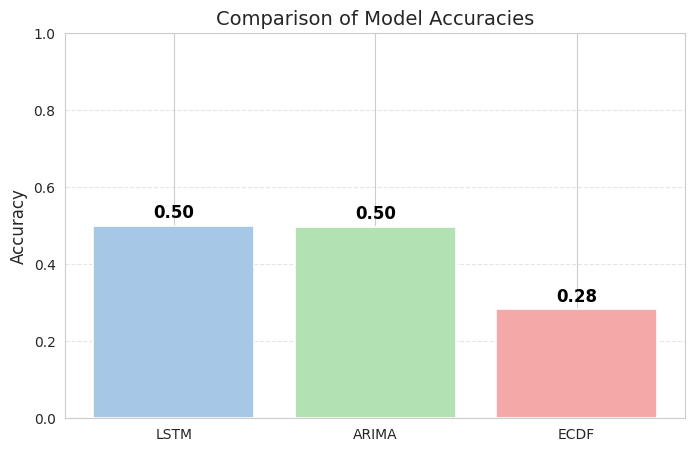

In [186]:
import matplotlib.pyplot as plt

# Accuracy values for different models
accuracy_values = [lstm_accuracy, arima_accuracy, ecdf_accuracy]
models = ['LSTM', 'ARIMA', 'ECDF']

# Define pastel colors for a more elegant visualization
colors = ['#A7C7E7', '#B2E1B3', '#F4A8A8']  # Soft pastel blue, green, and red

# Plot the accuracies with updated colors
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_values, color=colors, linewidth=1.2)
plt.ylim(0, 1)  # Accuracy range (0 to 100%)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the accuracy values on top of each bar
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.show()

In [187]:
df_ml['churn_label'].value_counts()

,count
churn_label,
0,17006
1,1514


------------------------------

### Machine Learning:

#### Pre-Processing for ML:

Feature Engineering:

In [188]:
# Ensure dataset is sorted by date for correct time-based feature calculations
df_ml = df_ml.sort_values(by=['PARTNER_ID', 'PRODUCT_CATEGORY', 'DATE'])

# Feature 1: Total & Average Purchase Metrics
df_ml['total_purchases'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['UNITS'].transform('sum')
df_ml['total_revenue'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['REVENUE_USD'].transform('sum')
df_ml['average_purchase_value'] = df_ml['total_revenue'] / df_ml['total_purchases']

# Feature 2: Recency & Purchase Patterns
df_ml['recency_days'] = (df_ml['DATE'].max() - df_ml['DATE']).dt.days
df_ml['average_time_between_purchases'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['Between_purchase_days'].transform('mean')

# Feature 3: Trend-Based Features
df_ml['revenue_trend'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['REVENUE_USD'].pct_change()
df_ml['purchase_frequency_trend'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['purchase_flag'].pct_change()
df_ml['revenue_volatility'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['REVENUE_USD'].transform('std')
df_ml['purchase_consistency'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['purchase_flag'].transform('sum') / df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['purchase_flag'].transform('count')

# Feature 4: Engagement Features
df_ml['distinct_quarters_purchased'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['quarter'].transform('nunique')
df_ml['online_purchase_ratio'] = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['ONLINE_FLAG'].transform('mean')
df_ml['customer_dependency'] = df_ml['total_revenue'] / df_ml.groupby('PARTNER_ID')['total_revenue'].transform('sum')

# Handle missing or infinite values (e.g., division errors)
df_ml.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ml.fillna(0, inplace=True)

In [189]:
df_ml = df_ml.drop(columns=['Previous_Purchase_Date','future_churn_label', 'churn_label_arima', 'churn_label_lstm','days_since_last_purchase'])

In [190]:
df_ml.columns

Index(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter', 'UNITS',
       'REVENUE_USD', 'DATA_FROM', 'IS_OPSI', 'ONLINE_FLAG', 'PARTNER_MARKET',
       'PARTNER_CLUSTER', 'PARTNER_COUNTRY', 'BUSINESS_UNIT', 'CHAI_MAPPING',
       'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'RAD_VERTICAL', 'DATE',
       'purchase_flag', 'Between_purchase_days', 'BPD_90_Percent',
       'churn_label', 'total_purchases', 'total_revenue',
       'average_purchase_value', 'recency_days',
       'average_time_between_purchases', 'revenue_trend',
       'purchase_frequency_trend', 'revenue_volatility',
       'purchase_consistency', 'distinct_quarters_purchased',
       'online_purchase_ratio', 'customer_dependency'],
      dtype='object')

In [155]:
df_ml.isnull().sum()

,0
PARTNER_ID,0
PRODUCT_CATEGORY,0
year,0
quarter,0
UNITS,0
REVENUE_USD,0
DATA_FROM,0
IS_OPSI,0
ONLINE_FLAG,0
PARTNER_MARKET,0


In [251]:
# Step 1: Ensure dataset is sorted correctly
df_ml = df_ml.sort_values(by=['PARTNER_ID', 'PRODUCT_CATEGORY', 'DATE'])

#Code to include only records upto 2022:
'''#Remove all 2023 data except for extracting the final churn_label
df_ml_filtered = df_ml[df_ml['DATE'].dt.year < 2023].copy()

#Extract the latest churn_label from Q4 2023
latest_churn_labels = df_ml[(df_ml['DATE'].dt.year == 2023) & (df_ml['quarter'] == 4)][
    ['PARTNER_ID', 'PRODUCT_CATEGORY', 'churn_label']
].drop_duplicates()

df_ml = df_ml_filtered'''

# Step 2: Extract the latest churn_label for each PARTNER_ID - PRODUCT_CATEGORY pair
latest_churn_labels = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])[['DATE', 'churn_label']].last().reset_index()

# Step 3: Aggregate data at the PARTNER_ID - PRODUCT_CATEGORY level
df_ml_agg = df_ml.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY']).agg({
    'UNITS': 'sum',  # Total units sold
    'REVENUE_USD': 'sum',  # Total revenue
    'IS_OPSI': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ONLINE_FLAG': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'Between_purchase_days': 'mean',  # Average days between purchases
    'BPD_90_Percent': 'mean',  # Average BPD over time
    'revenue_trend': 'mean',  # Mean revenue trend
    'purchase_frequency_trend': 'mean',  # Mean purchase frequency trend
    'revenue_volatility': 'mean',  # Mean revenue volatility
    'purchase_consistency': 'mean',  # Average purchase consistency
    'distinct_quarters_purchased': 'max',  # Number of unique quarters purchased in
    'online_purchase_ratio': 'mean',  # Ratio of online purchases
    'customer_dependency': 'mean',  # Customer dependency on the product
    'DATA_FROM': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',  # Most frequent data source
    'PARTNER_MARKET': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'PARTNER_CLUSTER': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'PARTNER_COUNTRY': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'BUSINESS_UNIT': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'CHAI_MAPPING': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'PRODUCT_SEGMENT': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'PRODUCT_GROUP': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'RAD_VERTICAL': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
}).reset_index()

# Step 4: Merge with latest churn labels
df_ml_agg = df_ml_agg.merge(latest_churn_labels, on=['PARTNER_ID', 'PRODUCT_CATEGORY'], how='left')

In [252]:
df_ml_agg.columns

Index(['PARTNER_ID', 'PRODUCT_CATEGORY', 'UNITS', 'REVENUE_USD', 'IS_OPSI',
       'ONLINE_FLAG', 'Between_purchase_days', 'BPD_90_Percent',
       'revenue_trend', 'purchase_frequency_trend', 'revenue_volatility',
       'purchase_consistency', 'distinct_quarters_purchased',
       'online_purchase_ratio', 'customer_dependency', 'DATA_FROM',
       'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY', 'BUSINESS_UNIT',
       'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'RAD_VERTICAL',
       'DATE', 'churn_label'],
      dtype='object')

#### EDA for ML:

In [158]:
# Filter df_ml for Q4 2023
df_q4_2023 = df_ml[(df_ml['year'] == 2023) & (df_ml['quarter'] == 4)]
# Count churn labels
churn_counts = df_q4_2023['churn_label'].value_counts()
churn_counts

,count
churn_label,
0,587
1,339


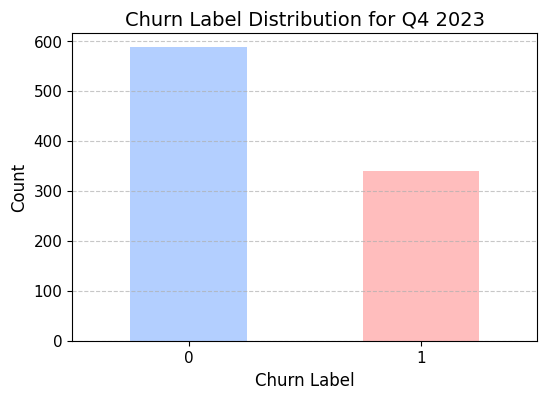

In [159]:
# Define a color palette with elegant and light colors
light_colors = ['#A0C4FF', '#FFADAD']  # Light blue for non-churn, light red for churn

# Plot the churn label distribution with light colors
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=light_colors, alpha=0.8)
plt.xlabel("Churn Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Churn Label Distribution for Q4 2023", fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [196]:
df_ml_agg['churn_label'].value_counts()

,count
churn_label,
0,587
1,339


In [211]:
import seaborn as sns
# Set Seaborn style
sns.set(style="whitegrid")

# 2. Revenue Distribution for Churned vs Non-Churned
'''plt.figure(figsize=(8,5))
sns.histplot(data=df_ml_agg, x='REVENUE_USD', hue='churn_label', kde=True, bins=50, palette=['#A7C7E7', '#F4A8A8'])
plt.xlabel("Revenue (USD)")
plt.ylabel("Count")
plt.title("Revenue Distribution for Churned vs Non-Churned")
plt.xscale('log')  # Log scale to handle large variations
plt.show()'''

'plt.figure(figsize=(8,5))\nsns.histplot(data=df_ml_agg, x=\'REVENUE_USD\', hue=\'churn_label\', kde=True, bins=50, palette=[\'#A7C7E7\', \'#F4A8A8\'])\nplt.xlabel("Revenue (USD)")\nplt.ylabel("Count")\nplt.title("Revenue Distribution for Churned vs Non-Churned")\nplt.xscale(\'log\')  # Log scale to handle large variations\nplt.show()'

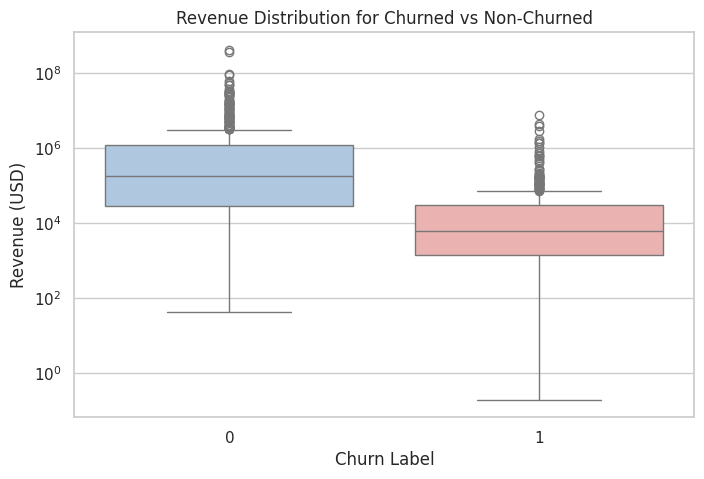

In [202]:
# 3. Boxplot: Revenue vs Churn Label
plt.figure(figsize=(8,5))
sns.boxplot(x='churn_label', y='REVENUE_USD', data=df_ml_agg, palette=['#A7C7E7', '#F4A8A8'])
plt.yscale('log')
plt.xlabel("Churn Label")
plt.ylabel("Revenue (USD)")
plt.title("Revenue Distribution for Churned vs Non-Churned")
plt.show()

In [209]:
# 4. Number of Distinct Quarters Purchased vs Churn Label
'''plt.figure(figsize=(8,5))
sns.boxplot(x='churn_label', y='distinct_quarters_purchased', data=df_ml_agg, palette=['#A7C7E7', '#F4A8A8'])
plt.xlabel("Churn Label")
plt.ylabel("Distinct Quarters Purchased")
plt.title("Purchase Frequency vs Churn")
plt.show()'''

'plt.figure(figsize=(8,5))\nsns.boxplot(x=\'churn_label\', y=\'distinct_quarters_purchased\', data=df_ml_agg, palette=[\'#A7C7E7\', \'#F4A8A8\'])\nplt.xlabel("Churn Label")\nplt.ylabel("Distinct Quarters Purchased")\nplt.title("Purchase Frequency vs Churn")\nplt.show()'

In [206]:
# 6. Revenue Trend for Churned vs Non-Churned Customers
'''plt.figure(figsize=(8,5))
sns.boxplot(x='churn_label', y='revenue_trend', data=df_ml_agg, palette=['#A7C7E7', '#F4A8A8'])
plt.xlabel("Churn Label")
plt.ylabel("Revenue Trend")
plt.title("Revenue Trend for Churned vs Non-Churned")
plt.show()'''

'plt.figure(figsize=(8,5))\nsns.boxplot(x=\'churn_label\', y=\'revenue_trend\', data=df_ml_agg, palette=[\'#A7C7E7\', \'#F4A8A8\'])\nplt.xlabel("Churn Label")\nplt.ylabel("Revenue Trend")\nplt.title("Revenue Trend for Churned vs Non-Churned")\nplt.show()'

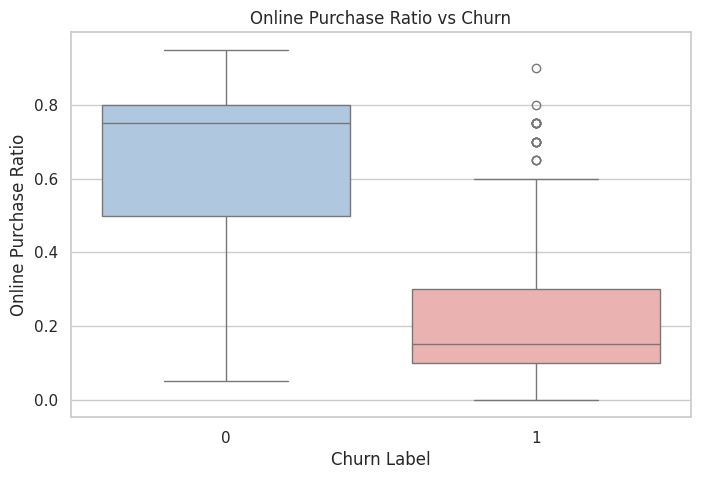

In [205]:
plt.figure(figsize=(8,5))
sns.boxplot(x='churn_label', y='online_purchase_ratio', data=df_ml_agg, palette=['#A7C7E7', '#F4A8A8'])
plt.xlabel("Churn Label")
plt.ylabel("Online Purchase Ratio")
plt.title("Online Purchase Ratio vs Churn")
plt.show()

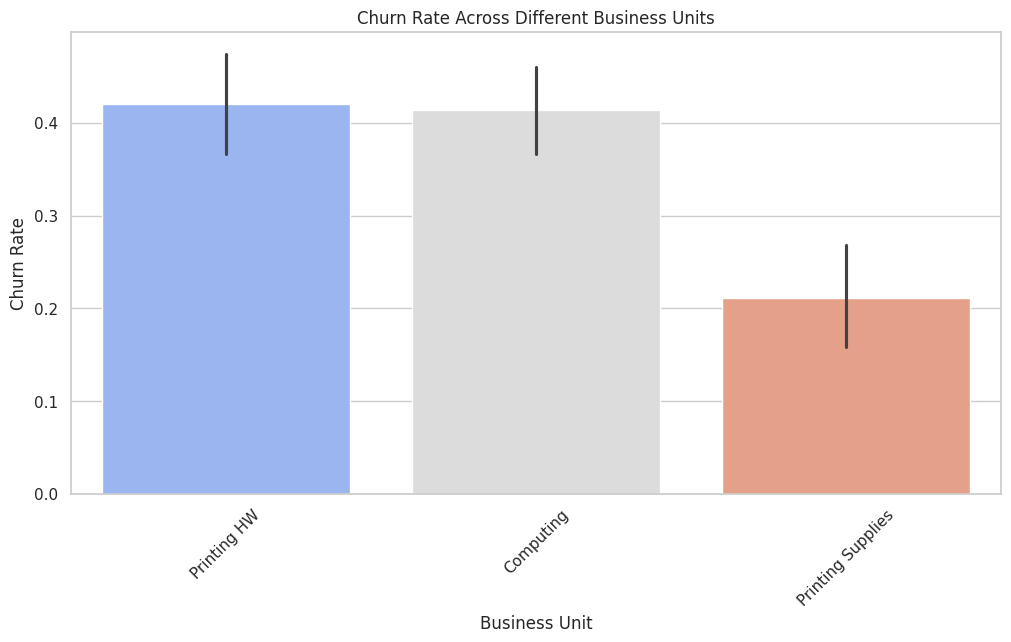

In [212]:
### 1. Churn Rate Across Different Business Units ###
plt.figure(figsize=(12,6))
sns.barplot(x='BUSINESS_UNIT', y='churn_label', data=df_ml_agg, estimator=lambda x: sum(x)/len(x), palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Business Unit")
plt.ylabel("Churn Rate")
plt.title("Churn Rate Across Different Business Units")
plt.show()

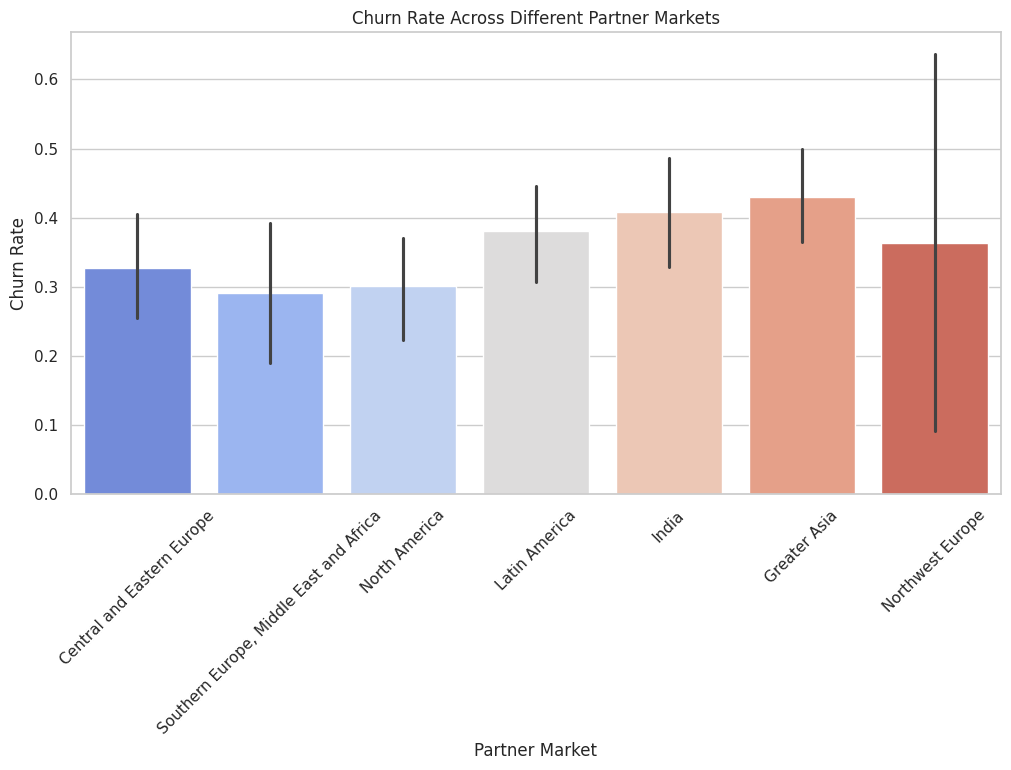

In [213]:
### 2. Churn Rate Across Partner Markets ###
plt.figure(figsize=(12,6))
sns.barplot(x='PARTNER_MARKET', y='churn_label', data=df_ml_agg, estimator=lambda x: sum(x)/len(x), palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Partner Market")
plt.ylabel("Churn Rate")
plt.title("Churn Rate Across Different Partner Markets")
plt.show()

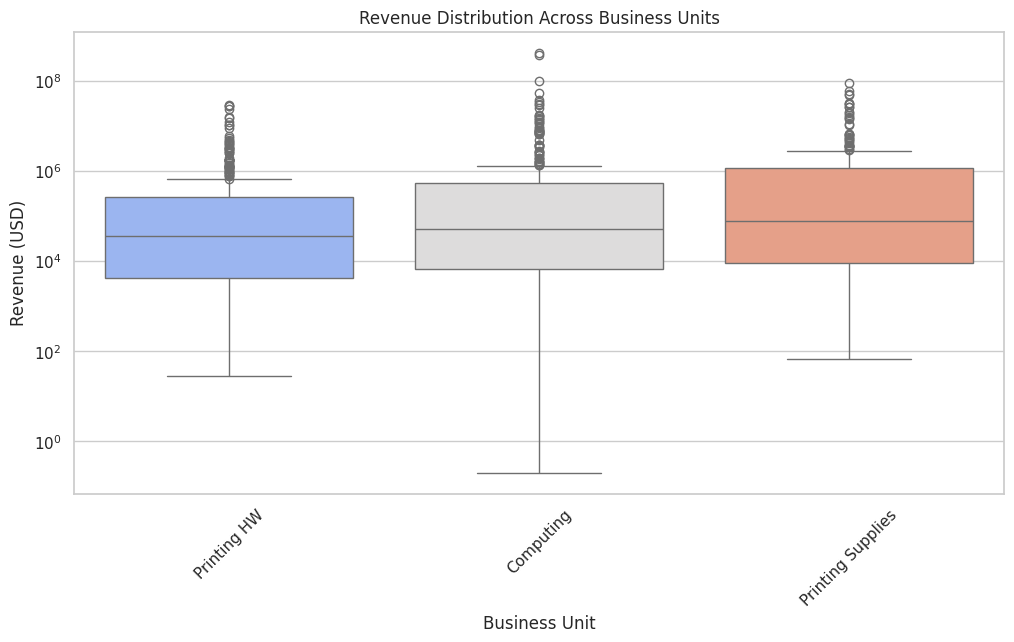

In [235]:
### 3. Revenue Distribution Across Business Units ###
plt.figure(figsize=(12,6))
sns.boxplot(x='BUSINESS_UNIT', y='REVENUE_USD', data=df_ml_agg, palette='coolwarm')
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale to handle large variations
plt.xlabel("Business Unit")
plt.ylabel("Revenue (USD)")
plt.title("Revenue Distribution Across Business Units")
plt.show()

In [217]:
### 4. Revenue Trends Across Business Units for Churned vs Non-Churned Customers ###
'''plt.figure(figsize=(12,6))
sns.boxplot(x='BUSINESS_UNIT', y='revenue_trend', hue='churn_label', data=df_ml_agg, palette=['#A7C7E7', '#F4A8A8'])
plt.xticks(rotation=45)
plt.xlabel("Business Unit")
plt.ylabel("Revenue Trend")
plt.title("Revenue Trends Across Business Units for Churned vs Non-Churned Customers")
plt.legend(title="Churn Label", labels=["Not Churned", "Churned"])
plt.show()'''

'plt.figure(figsize=(12,6))\nsns.boxplot(x=\'BUSINESS_UNIT\', y=\'revenue_trend\', hue=\'churn_label\', data=df_ml_agg, palette=[\'#A7C7E7\', \'#F4A8A8\'])\nplt.xticks(rotation=45)\nplt.xlabel("Business Unit")\nplt.ylabel("Revenue Trend")\nplt.title("Revenue Trends Across Business Units for Churned vs Non-Churned Customers")\nplt.legend(title="Churn Label", labels=["Not Churned", "Churned"])\nplt.show()'

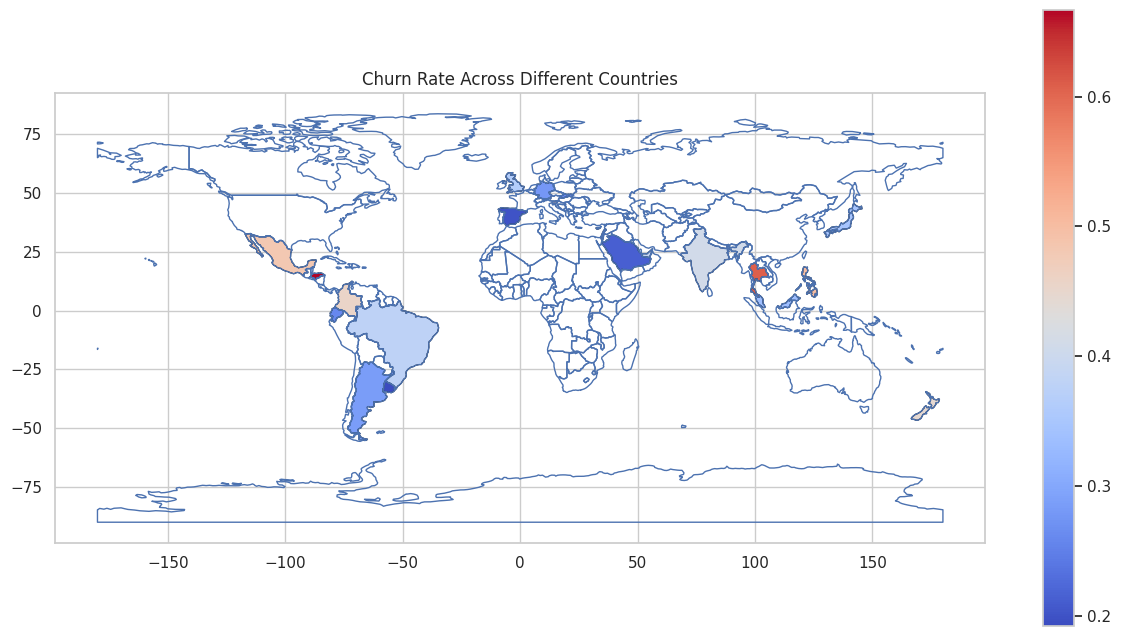

In [224]:
### 5. Churn Rate on a Geographical Map ###
# Load a world map
import geopandas as gpd
world = gpd.read_file("https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson")

# Aggregate churn rates per country
geo_churn = df_ml_agg.groupby('PARTNER_COUNTRY')['churn_label'].mean().reset_index()
geo_churn.rename(columns={'churn_label': 'Churn Rate'}, inplace=True)

# Merge with world map
world = world.merge(geo_churn, left_on="name", right_on="PARTNER_COUNTRY", how="left")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Churn Rate', cmap='coolwarm', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
plt.title("Churn Rate Across Different Countries")
plt.show()

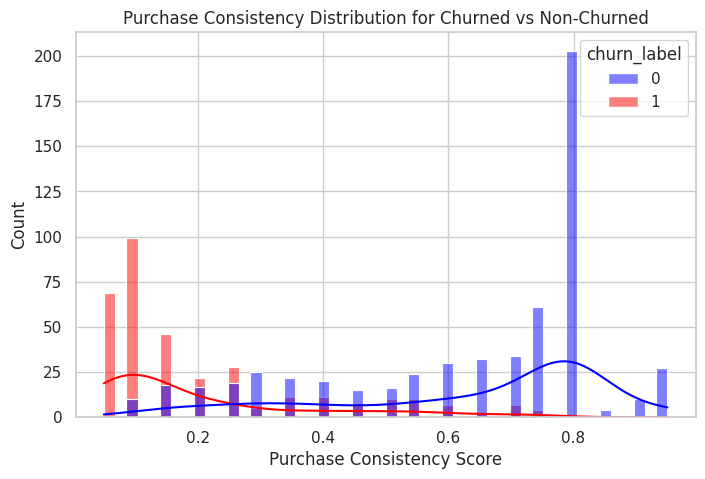

In [227]:
# 1. Distribution of Purchase Consistency vs Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df_ml_agg, x='purchase_consistency', hue='churn_label', kde=True, bins=50, palette=['blue', 'red'])
plt.xlabel("Purchase Consistency Score")
plt.ylabel("Count")
plt.title("Purchase Consistency Distribution for Churned vs Non-Churned")
plt.show()

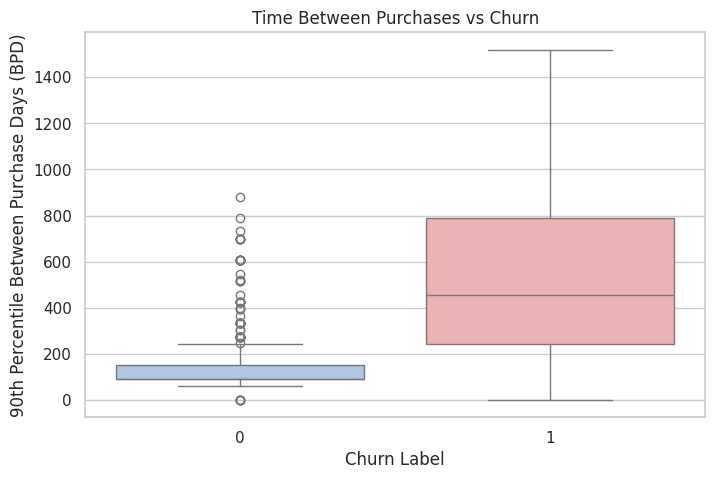

In [232]:
# 5. Boxplot: BPD 90 Percent vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='churn_label', y='BPD_90_Percent', data=df_ml_agg, palette=['#A7C7E7', '#F4A8A8'])
plt.xlabel("Churn Label")
plt.ylabel("90th Percentile Between Purchase Days (BPD)")
plt.title("Time Between Purchases vs Churn")
plt.show()

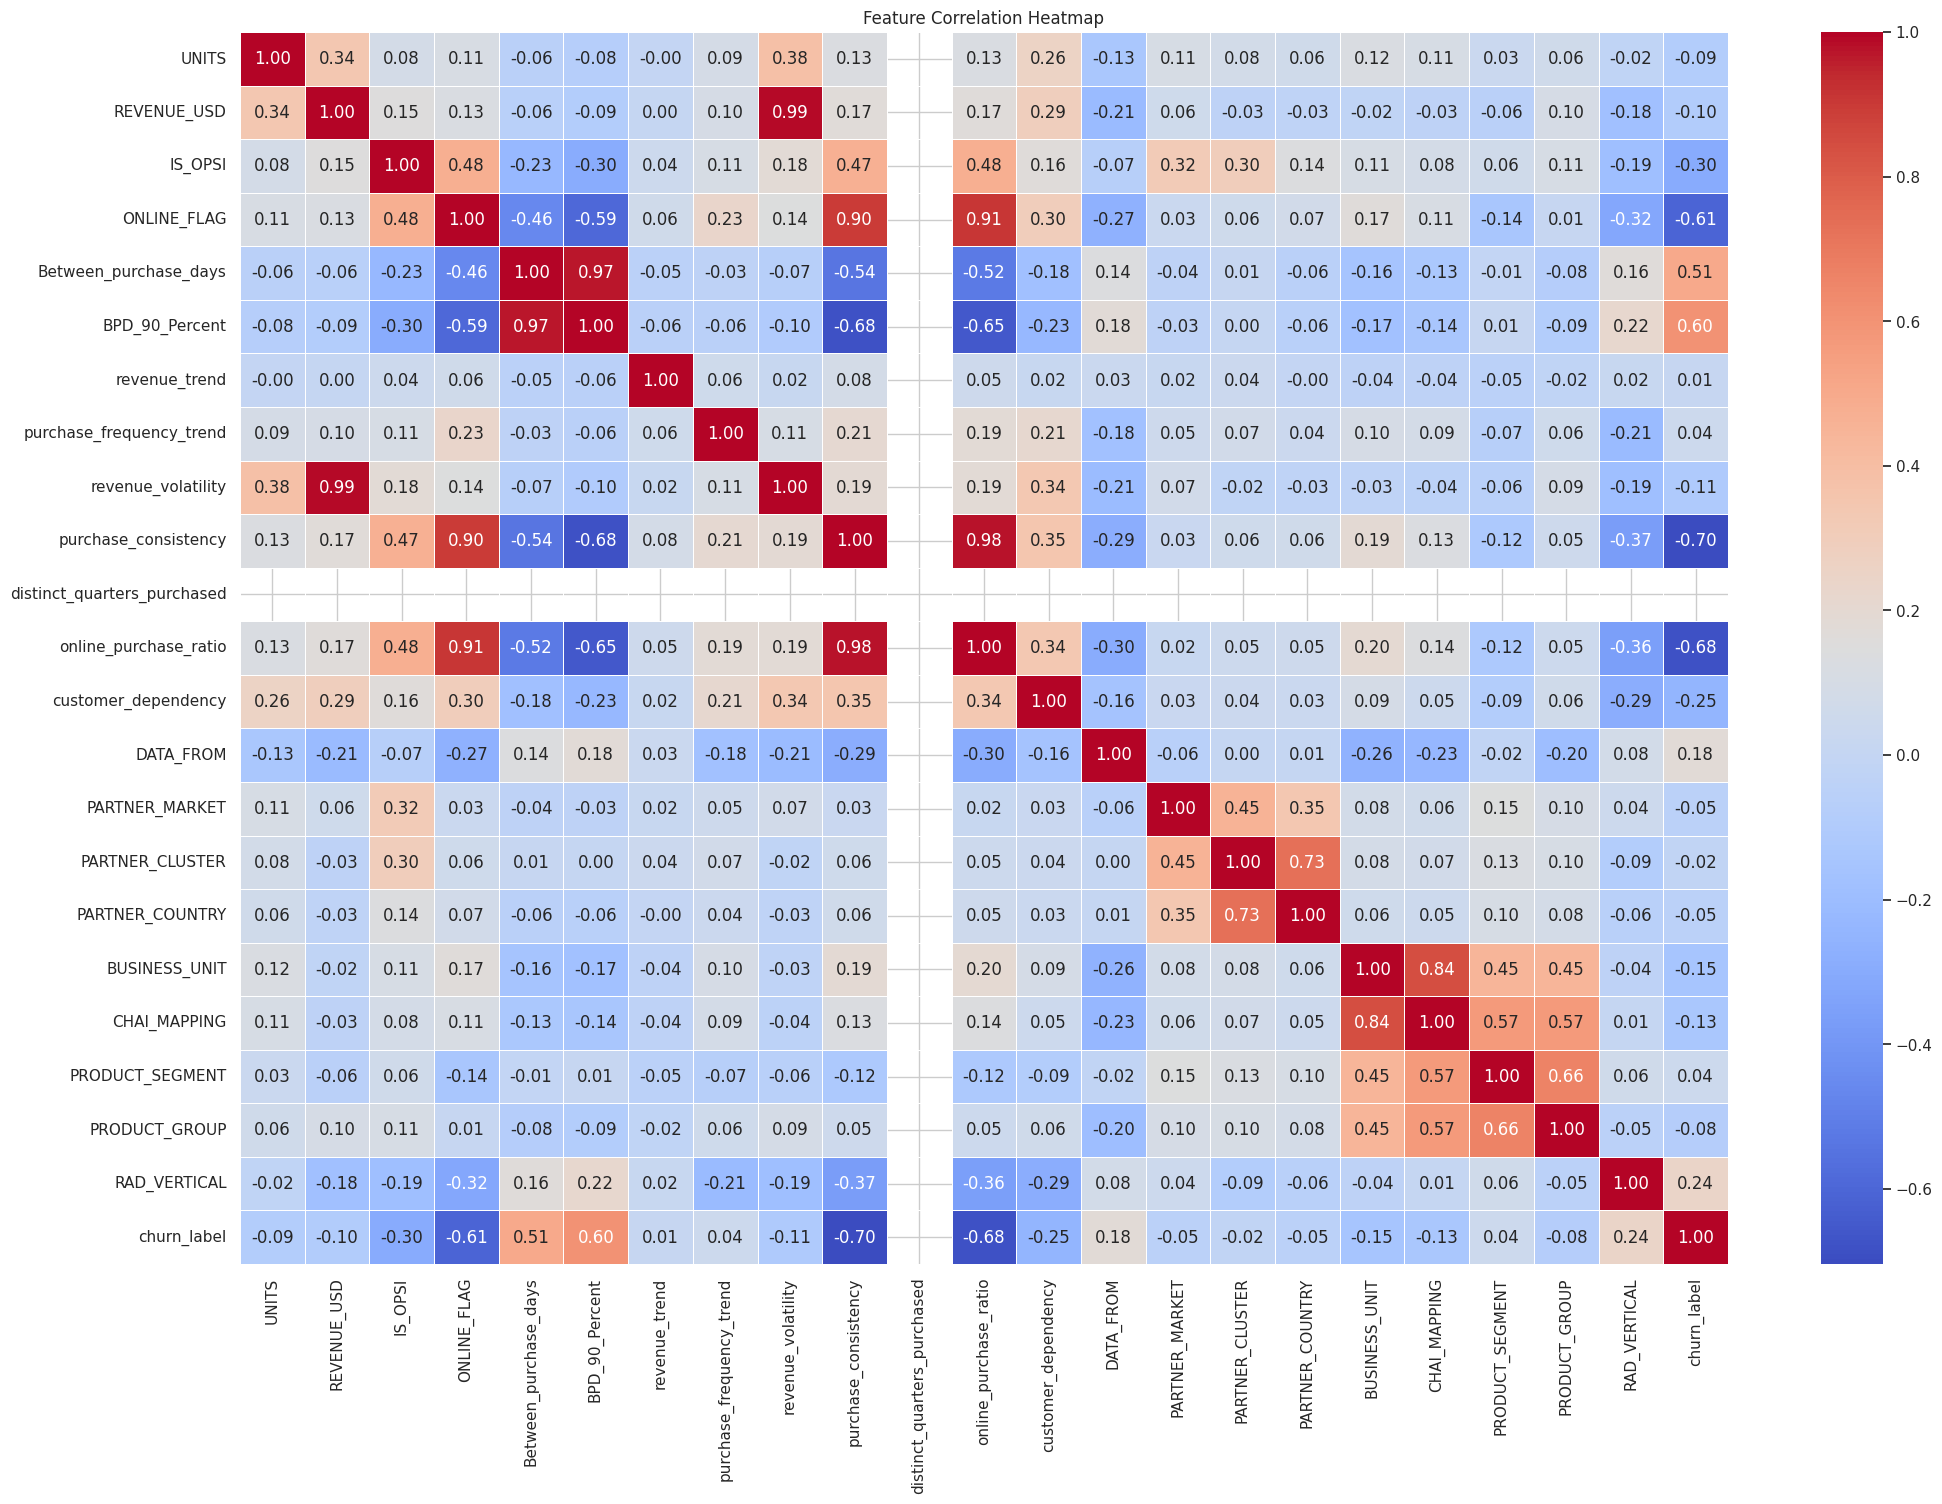

In [208]:
# 5. Heatmap of Correlations
# Convert categorical columns to numerical encoding for correlation calculation
df_numeric = df_ml_agg.copy()

# Identify categorical columns (excluding 'PARTNER_ID', 'PRODUCT_CATEGORY', 'DATE')
categorical_cols = df_numeric.select_dtypes(include=['object']).columns.tolist()
df_numeric[categorical_cols] = df_numeric[categorical_cols].astype('category').apply(lambda x: x.cat.codes)

# Compute correlation only on numeric columns
corr = df_numeric.drop(columns=['PARTNER_ID', 'PRODUCT_CATEGORY', 'DATE']).corr()

# Plot Heatmap
plt.figure(figsize=(24,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Modeling:

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [254]:
# Step 1: Identify categorical features
categorical_features = ['DATA_FROM', 'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY', 'BUSINESS_UNIT',
                        'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'RAD_VERTICAL']

df_ml_agg = df_ml_agg.copy()  # Avoid modifying the original dataset

# Step 2: Encode categorical features
for feature in categorical_features:
    if df_ml_agg[feature].nunique() > 10:  # High Cardinality -> Frequency Encoding
        freq_encoding = df_ml_agg[feature].value_counts().to_dict()
        df_ml_agg[feature] = df_ml_agg[feature].map(freq_encoding)
    else:  # Low Cardinality -> One-Hot Encoding
        df_ml_agg = pd.get_dummies(df_ml_agg, columns=[feature])

# Step 3: Define features (X) and target (y)
X = df_ml_agg.drop(columns=['PARTNER_ID', 'PRODUCT_CATEGORY', 'DATE', 'churn_label'], errors='ignore')
y = df_ml_agg['churn_label']

# Step 4: Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train a Random Forest model to determine feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Step 6: Get feature importances and select top 10 most important features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(15).index.tolist()

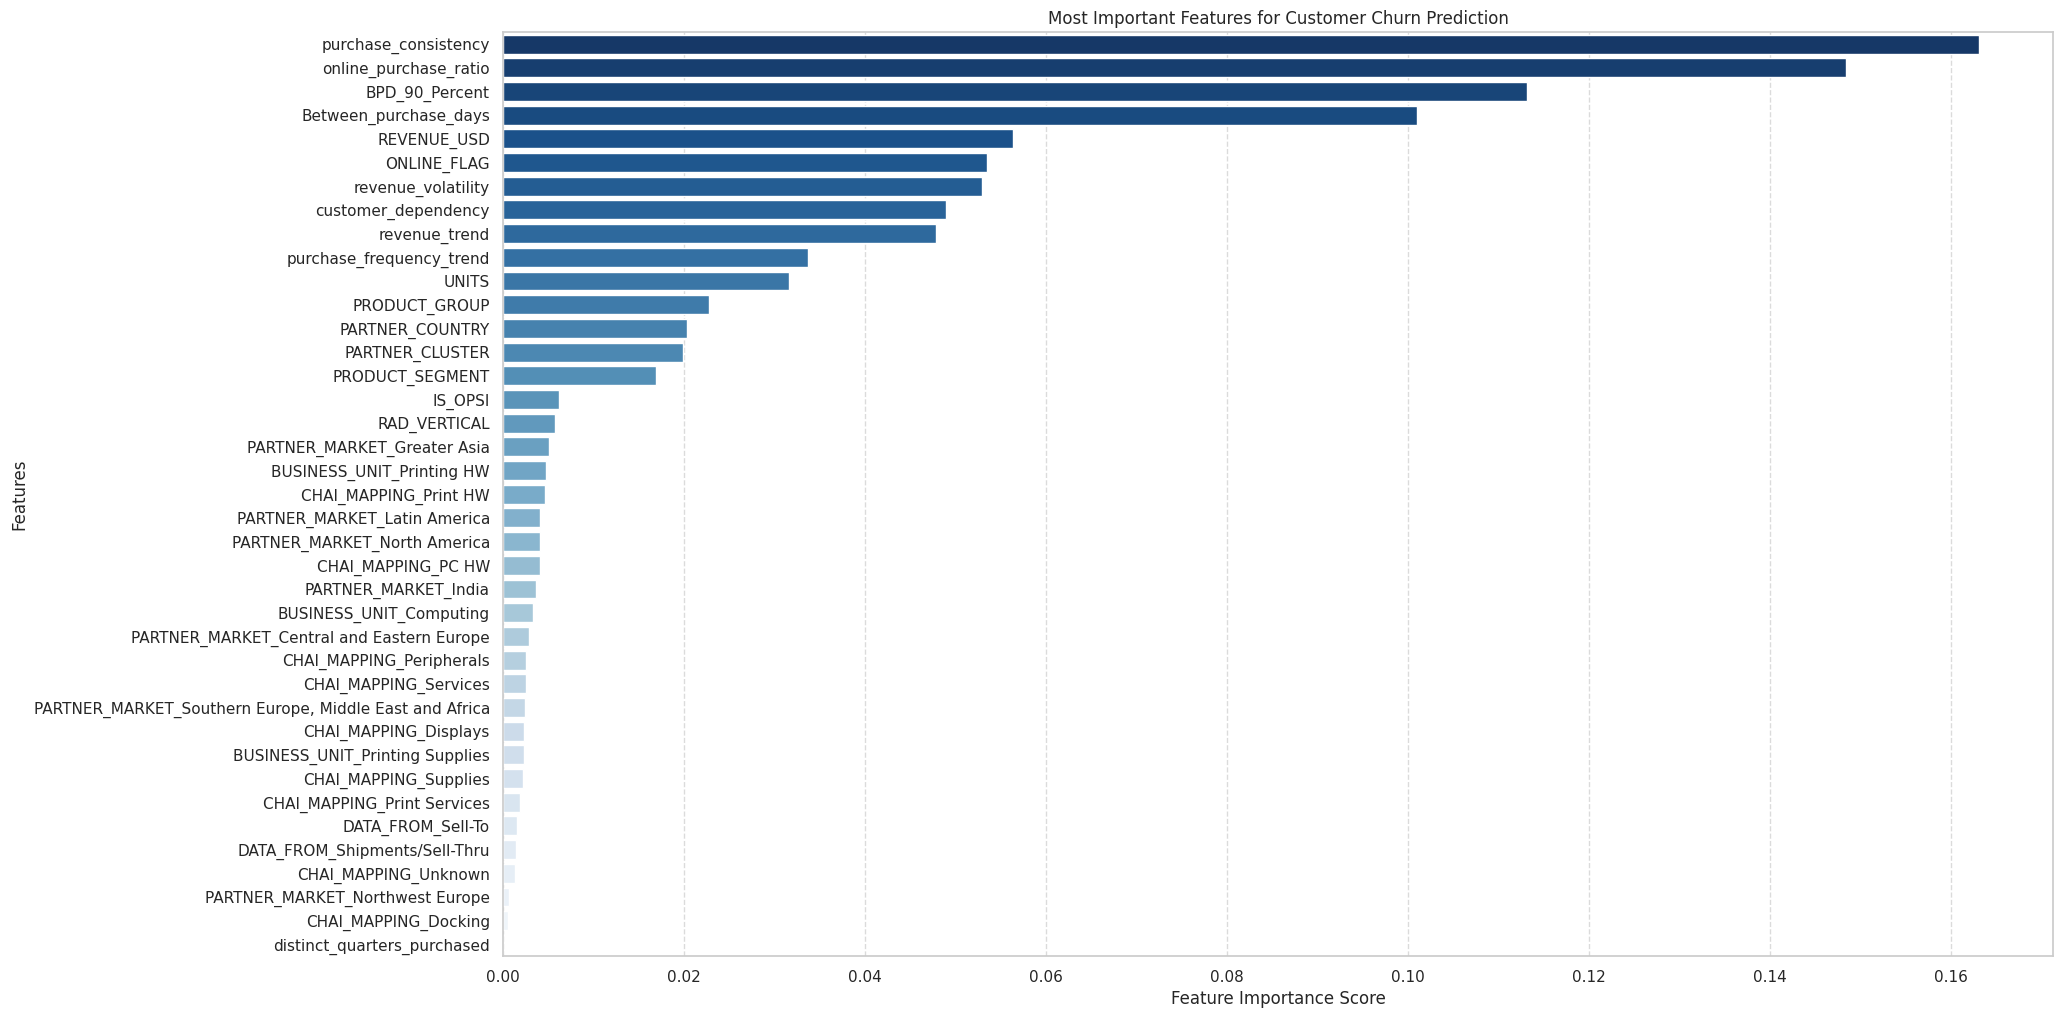

In [255]:
# Plot the top most important features in ascending order
plt.figure(figsize=(20, 12))
feature_importances_sorted = feature_importances.sort_values(ascending=False)  # Sort in ascending order
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index, palette="Blues_r")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Most Important Features for Customer Churn Prediction")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [256]:
# Step 7: Remove highly correlated features (Threshold = 0.85)
correlation_matrix = X[top_features].corr().abs()
high_corr_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.85:
            col_to_remove = correlation_matrix.columns[i] if feature_importances[correlation_matrix.columns[i]] < feature_importances[correlation_matrix.columns[j]] else correlation_matrix.columns[j]
            high_corr_pairs.add(col_to_remove)

# Step 8: Keep only top features that are not highly correlated
final_features = [feature for feature in top_features if feature not in high_corr_pairs]

# Step 9: Create final dataset with selected features
df_ml_final = df_ml_agg[['PARTNER_ID', 'PRODUCT_CATEGORY', 'churn_label'] + final_features]

In [257]:
df_ml_final

,PARTNER_ID,PRODUCT_CATEGORY,churn_label,purchase_consistency,BPD_90_Percent,REVENUE_USD,customer_dependency,revenue_trend,purchase_frequency_trend,UNITS,PRODUCT_GROUP,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT
0,0345M99-18534,big tank,0,0.60,182.0,1.143548e+04,0.000005,0.011603,-0.15,42.0,93,52,52,93
1,0345M99-18534,cloud clients,0,0.95,92.0,5.048027e+05,0.000224,-1.261942,-0.05,1377.0,111,52,52,191
2,0345M99-18534,commercial desktops,0,0.95,92.0,1.755258e+07,0.007794,0.140175,-0.05,31182.0,111,52,52,191
3,0345M99-18534,commercial displays,0,0.90,92.0,3.680379e+06,0.001634,0.639672,-0.10,0.0,37,52,52,191
4,0345M99-18534,commercial dockings,0,0.95,92.0,6.114343e+05,0.000271,1.168894,-0.05,0.0,37,52,52,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,654VOZFNY,ops ink supplies,0,0.80,92.0,6.964758e+04,0.001119,1.354731,-0.05,748.0,67,27,27,74
922,654VOZFNY,ops toner supplies,0,0.80,92.0,1.085301e+05,0.001743,0.587977,-0.05,602.0,62,27,27,74
923,654VOZFNY,ps lifecycle services,0,0.75,92.0,3.407900e+03,0.000055,0.363208,-0.10,0.0,32,27,27,33
924,654VOZFNY,scanners,1,0.05,335.0,1.278600e+03,0.000021,-0.050000,-0.05,2.0,22,27,27,22


Running ML Models

In [265]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

# Define features (X) and target (y)
X = df_ml_final.drop(columns=['PARTNER_ID', 'PRODUCT_CATEGORY', 'churn_label'], errors='ignore')
y = df_ml_final['churn_label']

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SGD Classifier": SGDClassifier(loss='squared_hinge', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Network)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}
# Perform 5-fold Cross Validation and store results
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy',error_score='raise')
    cv_results[model_name] = {
        "Mean Accuracy": np.mean(scores),
        "Standard Deviation": np.std(scores)
    }

# Convert results to DataFrame and display
cv_results_df = pd.DataFrame(cv_results).T

[LightGBM] [Info] Number of positive: 271, number of negative: 469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366216 -> initscore=-0.548484
[LightGBM] [Info] Start training from score -0.548484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [266]:
cv_results_df

,Mean Accuracy,Standard Deviation
Logistic Regression,0.772113,0.027408
SGD Classifier,0.638233,0.008153
Decision Tree,0.802296,0.043282
Random Forest,0.866068,0.023644
XGBoost,0.848811,0.021352
LightGBM,0.858547,0.017755
SVM (RBF Kernel),0.633909,0.002108
Naive Bayes,0.512915,0.033267
MLP (Neural Network),0.755920,0.022193


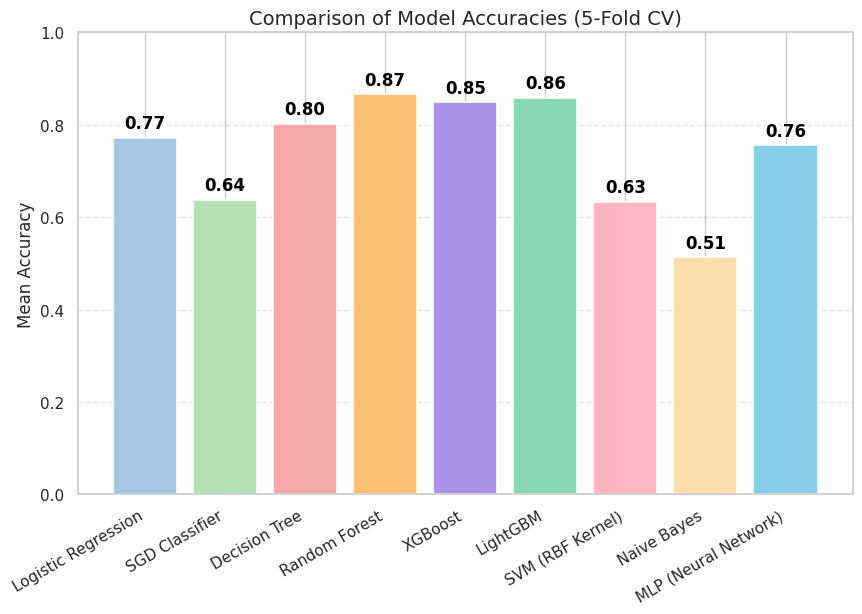

In [272]:
# Extract model names and mean accuracy scores
model_names = cv_results_df.index
mean_accuracies = cv_results_df["Mean Accuracy"]

# Define elegant colors
colors = ['#A7C7E7', '#B2E1B3', '#F4A8A8', '#FFC074', '#AC92EB', '#88D8B0', '#FFB6C1', '#FFDEAD', '#87CEEB']  # Soft pastel shades

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_accuracies, color=colors, linewidth=1.2)
plt.ylim(0, 1)  # Accuracy range (0 to 100%)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Comparison of Model Accuracies (5-Fold CV)", fontsize=14)
plt.xticks(rotation=30, ha='right')

# Display the accuracy values on top of each bar
for i, acc in enumerate(mean_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



Doing Grod Search to find the best parameters of the best models:

In [268]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for hyperparameter tuning
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.7, 1.0]
    },
    "LightGBM": {
        "n_estimators": [50, 100, 200],
        "max_depth": [-1, 10, 20],
        "learning_rate": [0.01, 0.1, 0.2],
        "num_leaves": [31, 50]
    },
    "MLP (Neural Network)": {
        "hidden_layer_sizes": [(50, 50), (100, 50), (100, 100)],
        "activation": ["relu", "tanh"],
        "solver": ["adam", "sgd"],
        "alpha": [0.0001, 0.001],
        "max_iter": [500, 1000]
    }
}

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLP (Neural Network)": MLPClassifier(random_state=42)
}

# Perform Grid Search with 5-Fold Cross Validation and store results
best_models = {}
cv_results = {}

for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X, y)

    best_models[model_name] = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    cv_results[model_name] = {
        "Best Params": best_params,
        "Mean Accuracy": best_score
    }

# Convert results to DataFrame and display
cv_results_grid_df = pd.DataFrame(cv_results).T

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Performing Grid Search for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Performing Grid Search for LightGBM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 339, number of negative: 587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 926, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366091 -> initscore=-0.549025
[LightGBM] [Info] Start training from score -0.549025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [269]:
cv_results_grid_df

,Best Params,Mean Accuracy
Random Forest,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.867161
XGBoost,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.867137
LightGBM,"{'learning_rate': 0.1, 'max_depth': -1, 'n_est...",0.863935
MLP (Neural Network),"{'activation': 'tanh', 'alpha': 0.001, 'hidden...",0.78079


In [271]:
cv_results_df.to_excel('output_cv_accuracies.xlsx', index=False)
cv_results_grid_df.to_excel('output_cv_grid_accuracies.xlsx', index=False)

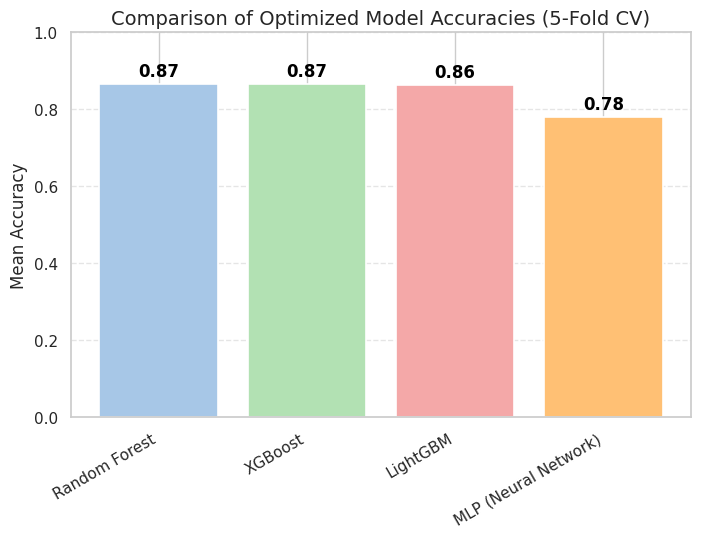

In [273]:
# Extract model names and mean accuracy scores from the grid search results
model_names = cv_results_grid_df.index
mean_accuracies = cv_results_grid_df["Mean Accuracy"]

# Define elegant colors for visualization
colors = ['#A7C7E7', '#B2E1B3', '#F4A8A8', '#FFC074']  # Soft pastel shades

# Plot the accuracies of the optimized models
plt.figure(figsize=(8, 5))
plt.bar(model_names, mean_accuracies, color=colors, linewidth=1.2)
plt.ylim(0, 1)  # Accuracy range (0 to 100%)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Comparison of Optimized Model Accuracies (5-Fold CV)", fontsize=14)
plt.xticks(rotation=30, ha='right')

# Display the accuracy values on top of each bar
for i, acc in enumerate(mean_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()